Insert the package pyod which using the comment here to storage
git clone https://github.com/yzhao062/pyod.git
cd pyod
pip install .

In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean
spark = SparkSession.builder.appName('Life expectancy prediction').getOrCreate()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # apply the plot
import seaborn as sns
import datetime as dt
%matplotlib inline
#from pyod.models.abod import ABOD
#from pyod.models.cblof import CBLOF
#from pyspark.ml.stat import Correlation
import warnings
warnings.filterwarnings('ignore')



Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/13 07:14:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df_ing = spark.read.csv('Life Expectancy Data developing.csv', header=True, inferSchema=True)
df_ed = spark.read.csv('Life Expectancy Data-Developed.csv', header=True, inferSchema=True)

df_ing.columns

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [3]:
df_ed.columns

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [4]:
df_ing.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: integer (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Hepatitis B: integer (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- Diphtheria : integer (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)



In [5]:
df_ed.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: integer (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Hepatitis B: integer (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- Diphtheria : integer (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: integer (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)



In [6]:
df_ing.toPandas().describe().transpose()

count          mean           std  \
Year                             2426.0  2.007523e+03  4.614690e+00   
Life expectancy                  2416.0  6.711147e+01  9.006092e+00   
Adult Mortality                  2416.0  1.828332e+02  1.279746e+02   
infant deaths                    2426.0  3.638417e+01  1.289425e+02   
Alcohol                          2260.0  3.484119e+00  3.347537e+00   
percentage expenditure           2426.0  3.234703e+02  8.466554e+02   
Hepatitis B                      2046.0  7.976393e+01  2.556488e+01   
Measles                          2426.0  2.824926e+03  1.252881e+04   
 BMI                             2392.0  3.543533e+01  1.942509e+01   
under-five deaths                2426.0  5.052514e+01  1.753799e+02   
Polio                            2407.0  8.017075e+01  2.467153e+01   
Total expenditure                2232.0  5.590694e+00  2.233756e+00   
Diphtheria                       2407.0  7.995181e+01  2.483430e+01   
 HIV/AIDS                        2426.0  2.088664e+00  5.526145e+00   
GDP                              2042.0  4.286556e+03  8.772468e+03   
Population                       1870.0  1.407108e+07  6.702886e+07   
 thinness  1-19 years            2392.0  5.592935e+00  4.514453e+00   
 thinness 5-9 years              2392.0  5.635242e+00  4.606130e+00   
Income composition of resources  2307.0  5.823099e-01  2.015966e-01   
Schooling                        2311.0  1.121926e+01  3.056601e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life expectancy                    36.30000      61.100000  6.900000e+01   
Adult Mortality                     1.00000      92.000000  1.630000e+02   
infant deaths                       0.00000       1.000000  6.000000e+00   
Alcohol                             0.01000       0.517500  2.560000e+00   
percentage expenditure              0.00000       3.616102  4.843183e+01   
Hepatitis B                         1.00000      75.000000  9.100000e+01   
Measles                             0.00000       0.000000  1.800000e+01   
 BMI                                1.00000      18.300000  3.520000e+01   
under-five deaths                   0.00000       1.000000  7.000000e+00   
Polio                               3.00000      74.000000  9.100000e+01   
Total expenditure                   0.37000       4.140000  5.400000e+00   
Diphtheria                          2.00000      75.000000  9.100000e+01   
 HIV/AIDS                           0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     382.749830  1.246022e+03   
Population                         34.00000  193808.250000  1.404827e+06   
 thinness  1-19 years               0.10000       2.100000  4.500000e+00   
 thinness 5-9 years                 0.10000       2.100000  4.600000e+00   
Income composition of resources     0.00000       0.466500  6.310000e-01   
Schooling                           0.00000       9.600000  1.170000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life expectancy                  7.400000e+01  8.900000e+01  
Adult Mortality                  2.530000e+02  7.230000e+02  
infant deaths                    2.800000e+01  1.800000e+03  
Alcohol                          5.750000e+00  1.787000e+01  
percentage expenditure           2.577022e+02  9.748636e+03  
Hepatitis B                      9.700000e+01  9.900000e+01  
Measles                          5.145000e+02  2.121830e+05  
 BMI                             5.320000e+01  8.730000e+01  
under-five deaths                3.900000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                6.830000e+00  1.724000e+01  
Diphtheria                       9.650000e+01  9.900000e+01  
 HIV/AIDS                        1.400000e+00  5.060000e+01  
GDP            

In [7]:
# it's formating is strange for output all together which the only way is display individually
df_ing.select('Status').describe().show()
df_ing.select('Year').describe().show()
df_ing.select('Adult Mortality').describe().show()
df_ing.select('Life expectancy ').describe().show()
df_ing.select('infant deaths').describe().show()
df_ing.select('Alcohol').describe().show()
df_ing.select('percentage expenditure').describe().show()
df_ing.select('Hepatitis B').describe().show()
df_ing.select('Measles ').describe().show()
df_ing.select(' BMI ').describe().show()
df_ing.select('under-five deaths ').describe().show()
df_ing.select('Polio').describe().show()
df_ing.select('Total expenditure').describe().show()
df_ing.select('Diphtheria ').describe().show()
df_ing.select(' HIV/AIDS').describe().show()
df_ing.select('GDP').describe().show()
df_ing.select('Population').describe().show()
df_ing.select(' thinness  1-19 years').describe().show()
df_ing.select(' thinness 5-9 years').describe().show()
df_ing.select('Income composition of resources').describe().show()
df_ing.select('Schooling').describe().show()

+-------+----------+
|summary|    Status|
+-------+----------+
|  count|      2426|
|   mean|      null|
| stddev|      null|
|    min|Developing|
|    max|Developing|
+-------+----------+

+-------+-----------------+
|summary|             Year|
+-------+-----------------+
|  count|             2426|
|   mean|2007.522671063479|
| stddev|4.614689816183881|
|    min|             2000|
|    max|             2015|
+-------+-----------------+

+-------+------------------+
|summary|   Adult Mortality|
+-------+------------------+
|  count|              2416|
|   mean| 182.8331953642384|
| stddev|127.97455715322445|
|    min|                 1|
|    max|               723|
+-------+------------------+

+-------+-----------------+
|summary| Life expectancy |
+-------+-----------------+
|  count|             2416|
|   mean|67.11146523178817|
| stddev|9.006092081529324|
|    min|             36.3|
|    max|             89.0|
+-------+-----------------+

+-------+------------------+
|summary|    

In [8]:
df_ed.toPandas().describe().transpose()

count          mean           std  \
Year                             512.0  2.007500e+03  4.614281e+00   
Life expectancy                  512.0  7.919785e+01  3.930942e+00   
Adult Mortality                  512.0  7.968555e+01  4.787758e+01   
infant deaths                    512.0  1.494141e+00  4.585774e+00   
Alcohol                          484.0  9.826736e+00  2.765858e+00   
percentage expenditure           512.0  2.703600e+03  3.824201e+03   
Hepatitis B                      339.0  8.804130e+01  2.048924e+01   
Measles                          512.0  4.990059e+02  2.529085e+03   
 BMI                             512.0  5.180391e+01  1.719683e+01   
under-five deaths                512.0  1.810547e+00  5.384006e+00   
Polio                            512.0  9.373633e+01  1.078371e+01   
Total expenditure                480.0  7.554042e+00  2.984389e+00   
Diphtheria                       512.0  9.347656e+01  1.253111e+01   
 HIV/AIDS                        512.0  1.000000e-01  1.389136e-17   
GDP                              448.0  2.205339e+04  2.287083e+04   
Population                       416.0  6.830053e+06  1.479524e+07   
 thinness  1-19 years            512.0  1.320703e+00  7.565766e-01   
 thinness 5-9 years              512.0  1.296680e+00  8.290994e-01   
Income composition of resources  464.0  8.524892e-01  5.284326e-02   
Schooling                        464.0  1.584547e+01  1.766799e+00   

                                        min            25%           50%  \
Year                             2000.00000    2003.750000  2.007500e+03   
Life expectancy                    69.90000      76.800000  7.925000e+01   
Adult Mortality                     1.00000      58.000000  7.300000e+01   
infant deaths                       0.00000       0.000000  0.000000e+00   
Alcohol                             0.01000       8.617500  1.032000e+01   
percentage expenditure              0.00000      92.904052  8.466156e+02   
Hepatitis B                         2.00000      89.000000  9.500000e+01   
Measles                             0.00000       0.000000  1.200000e+01   
 BMI                                3.20000      53.775000  5.745000e+01   
under-five deaths                   0.00000       0.000000  0.000000e+00   
Polio                               9.00000      93.000000  9.600000e+01   
Total expenditure                   1.10000       6.407500  7.895000e+00   
Diphtheria                          9.00000      93.750000  9.600000e+01   
 HIV/AIDS                           0.10000       0.100000  1.000000e-01   
GDP                                12.27733    3875.740910  1.356072e+04   
Population                        123.00000  199328.250000  1.167660e+06   
 thinness  1-19 years               0.30000       0.700000  1.100000e+00   
 thinness 5-9 years                 0.20000       0.600000  1.000000e+00   
Income composition of resources     0.70300       0.815000  8.620000e-01   
Schooling                          11.50000      14.700000  1.580000e+01   

                                          75%           max  
Year                             2.011250e+03  2.015000e+03  
Life expectancy                  8.170000e+01  8.900000e+01  
Adult Mortality                  9.600000e+01  2.290000e+02  
infant deaths                    1.000000e+00  2.800000e+01  
Alcohol                          1.169750e+01  1.519000e+01  
percentage expenditure           4.102863e+03  1.947991e+04  
Hepatitis B                      9.700000e+01  9.900000e+01  
Measles                          9.650000e+01  3.381200e+04  
 BMI                             6.130000e+01  6.960000e+01  
under-five deaths                2.000000e+00  3.300000e+01  
Polio                            9.800000e+01  9.900000e+01  
Total expenditure                9.212500e+00  1.760000e+01  
Diphtheria                       9.800000e+01  9.900000e+01  
 HIV/AIDS                        1.000000e-01  1.000000e-01  
GDP                              3.

In [9]:
df_ed.select('Status').describe().show()
df_ed.select('Year').describe().show()
df_ed.select('Adult Mortality').describe().show()
df_ed.select('Life expectancy ').describe().show()
df_ed.select('infant deaths').describe().show()
df_ed.select('Alcohol').describe().show()
df_ed.select('percentage expenditure').describe().show()
df_ed.select('Hepatitis B').describe().show()
df_ed.select('Measles ').describe().show()
df_ed.select(' BMI ').describe().show()
df_ed.select('under-five deaths ').describe().show()
df_ed.select('Polio').describe().show()
df_ed.select('Total expenditure').describe().show()
df_ed.select('Diphtheria ').describe().show()
df_ed.select(' HIV/AIDS').describe().show()
df_ed.select('GDP').describe().show()
df_ed.select('Population').describe().show()
df_ed.select(' thinness  1-19 years').describe().show()
df_ed.select(' thinness 5-9 years').describe().show()
df_ed.select('Income composition of resources').describe().show()
df_ed.select('Schooling').describe().show()

+-------+---------+
|summary|   Status|
+-------+---------+
|  count|      512|
|   mean|     null|
| stddev|     null|
|    min|Developed|
|    max|Developed|
+-------+---------+

+-------+-----------------+
|summary|             Year|
+-------+-----------------+
|  count|              512|
|   mean|           2007.5|
| stddev|4.614280564421879|
|    min|             2000|
|    max|             2015|
+-------+-----------------+

+-------+-----------------+
|summary|  Adult Mortality|
+-------+-----------------+
|  count|              512|
|   mean|     79.685546875|
| stddev|47.87758307342578|
|    min|                1|
|    max|              229|
+-------+-----------------+

+-------+------------------+
|summary|  Life expectancy |
+-------+------------------+
|  count|               512|
|   mean| 79.19785156249996|
| stddev|3.9309419447296756|
|    min|              69.9|
|    max|              89.0|
+-------+------------------+

+-------+-----------------+
|summary|    infant dea

In [10]:
# conjoin to dataset together
df=df_ing.unionByName(df_ed)
df.columns

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [11]:
df.select('Status').describe().show()
df.select('Year').describe().show()
df.select('Adult Mortality').describe()
df.corr('Life expectancy ','Adult Mortality')
df.select('Life expectancy ').describe().show()
df.select('infant deaths').describe().show()
df.select('Alcohol').describe().show()
df.select('percentage expenditure').describe().show()
df.select('Hepatitis B').describe().show()
df.select('Measles ').describe().show()
df.select(' BMI ').describe().show()
df.select('under-five deaths ').describe().show()
df.select('Polio').describe().show()
df.select('Total expenditure').describe().show()
df.select('Diphtheria ').describe().show()
df.select(' HIV/AIDS').describe().show()
df.select('GDP').describe().show()
df.select('Population').describe().show()
df.select(' thinness  1-19 years').describe().show()
df.select(' thinness 5-9 years').describe().show()
df.select('Income composition of resources').describe().show()
df.select('Schooling').describe().show()

+-------+----------+
|summary|    Status|
+-------+----------+
|  count|      2938|
|   mean|      null|
| stddev|      null|
|    min| Developed|
|    max|Developing|
+-------+----------+

+-------+------------------+
|summary|              Year|
+-------+------------------+
|  count|              2938|
|   mean|2007.5187202178352|
| stddev|   4.6138409402581|
|    min|              2000|
|    max|              2015|
+-------+------------------+

+-------+-----------------+
|summary| Life expectancy |
+-------+-----------------+
|  count|             2928|
|   mean|69.22493169398915|
| stddev|9.523867487824305|
|    min|             36.3|
|    max|             89.0|
+-------+-----------------+

+-------+------------------+
|summary|     infant deaths|
+-------+------------------+
|  count|              2938|
|   mean|30.303948264125257|
| stddev|117.92650131339904|
|    min|                 0|
|    max|              1800|
+-------+------------------+

+-------+-----------------+
|summ

In [12]:
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: integer (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Hepatitis B: integer (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- Diphtheria : integer (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)



In [13]:
df.toPandas().describe().transpose()

count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
 BMI                             2904.0  3.832125e+01  2.004403e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2919.0  8.255019e+01  2.342805e+01   
Total expenditure                2712.0  5.938190e+00  2.498320e+00   
Diphtheria                       2919.0  8.232408e+01  2.371691e+01   
 HIV/AIDS                        2938.0  1.742103e+00  5.077785e+00   
GDP                              2490.0  7.483158e+03  1.427017e+04   
Population                       2286.0  1.275338e+07  6.101210e+07   
 thinness  1-19 years            2904.0  4.839704e+00  4.420195e+00   
 thinness 5-9 years              2904.0  4.870317e+00  4.508882e+00   
Income composition of resources  2771.0  6.275511e-01  2.109036e-01   
Schooling                        2775.0  1.199279e+01  3.358920e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life expectancy                    36.30000      63.100000  7.210000e+01   
Adult Mortality                     1.00000      74.000000  1.440000e+02   
infant deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       0.877500  3.755000e+00   
percentage expenditure              0.00000       4.685343  6.491291e+01   
Hepatitis B                         1.00000      77.000000  9.200000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
 BMI                                1.00000      19.300000  4.350000e+01   
under-five deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total expenditure                   0.37000       4.260000  5.755000e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
 HIV/AIDS                           0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     463.935626  1.766948e+03   
Population                         34.00000  195793.250000  1.386542e+06   
 thinness  1-19 years               0.10000       1.600000  3.300000e+00   
 thinness 5-9 years                 0.10000       1.500000  3.300000e+00   
Income composition of resources     0.00000       0.493000  6.770000e-01   
Schooling                           0.00000      10.100000  1.230000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life expectancy                  7.570000e+01  8.900000e+01  
Adult Mortality                  2.280000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.800000e+03  
Alcohol                          7.702500e+00  1.787000e+01  
percentage expenditure           4.415341e+02  1.947991e+04  
Hepatitis B                      9.700000e+01  9.900000e+01  
Measles                          3.602500e+02  2.121830e+05  
 BMI                             5.620000e+01  8.730000e+01  
under-five deaths                2.800000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                7.492500e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
 HIV/AIDS                        8.000000e-01  5.060000e+01  
GDP            

## Correlation

<AxesSubplot:>

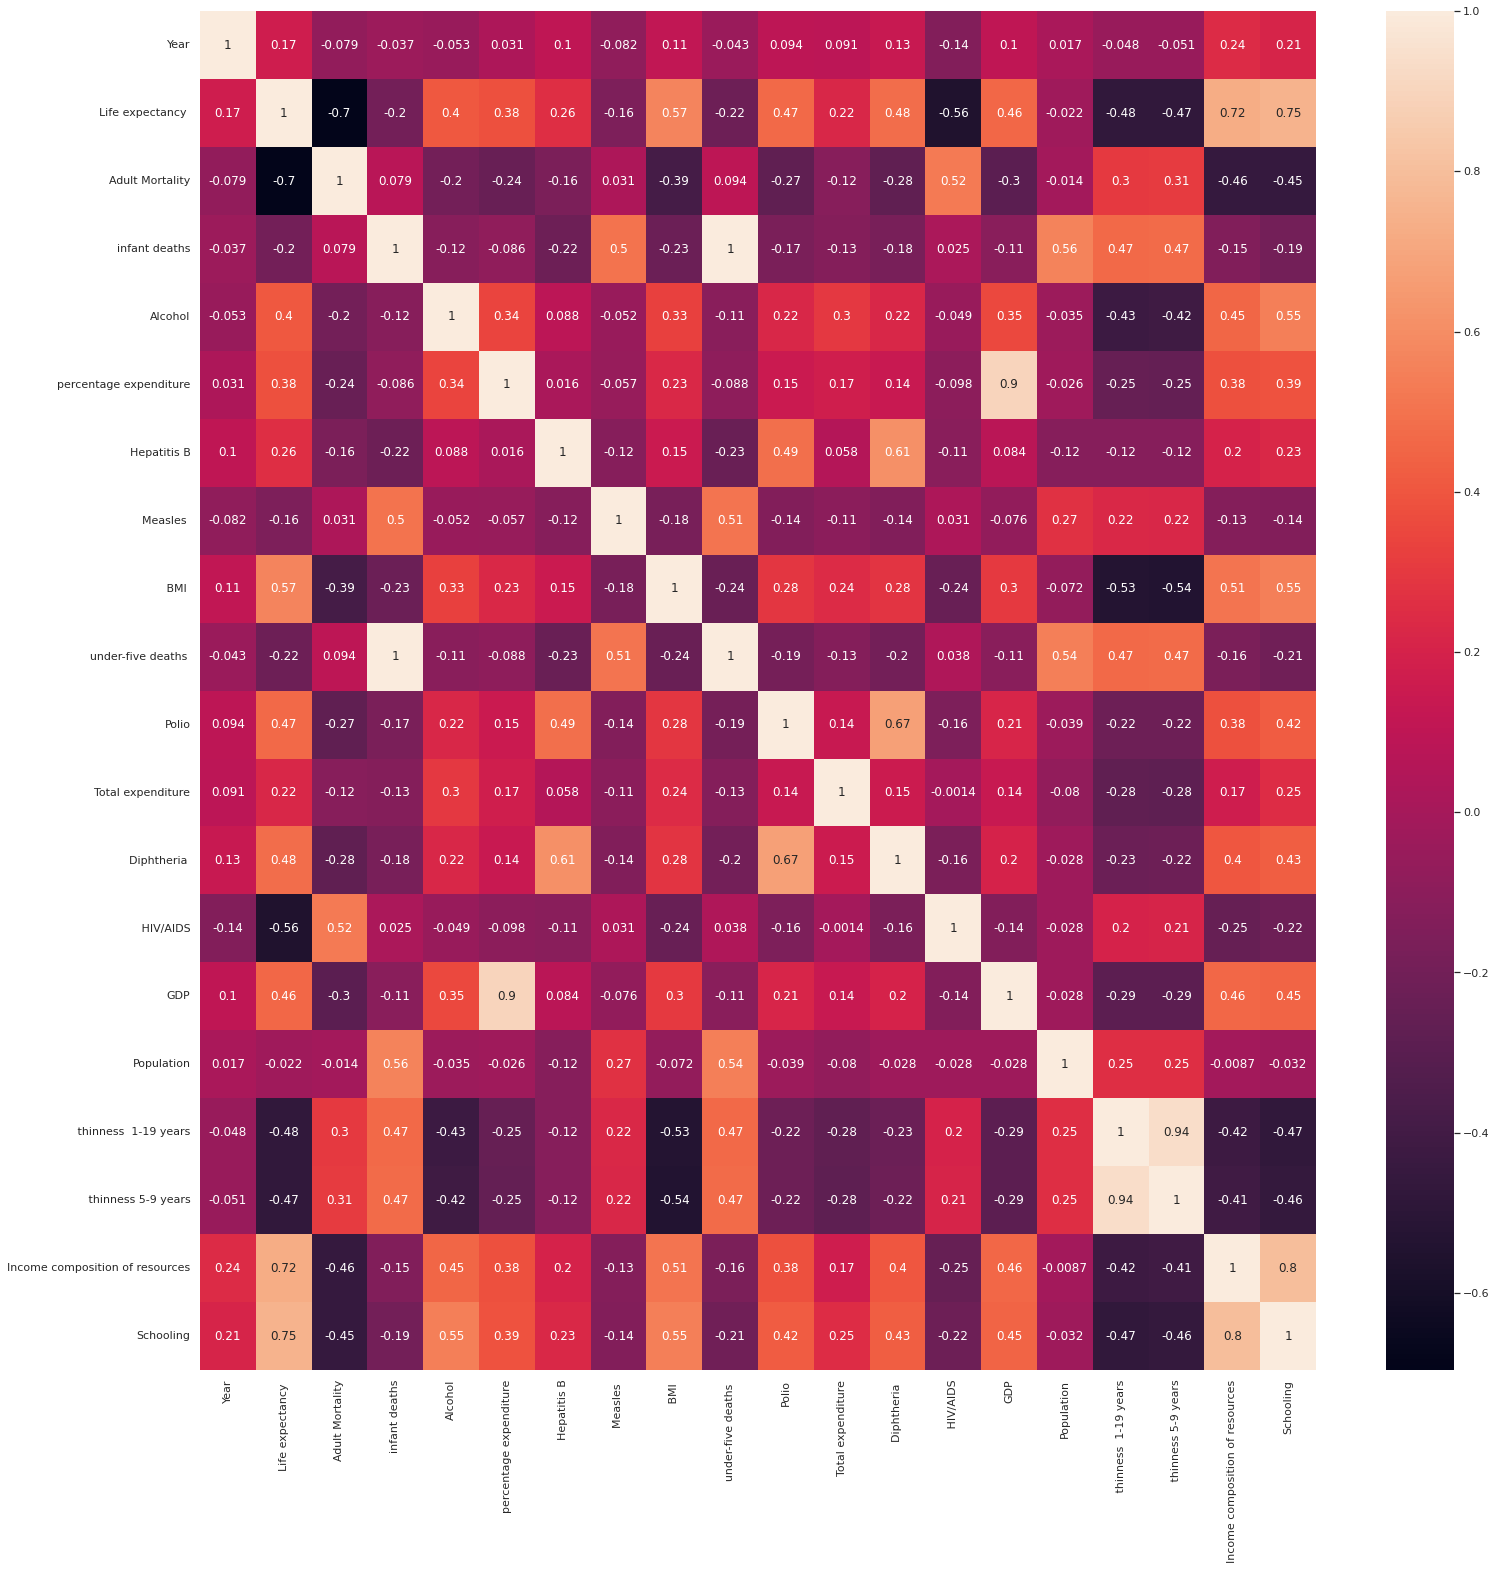

In [14]:
sns.set(rc={'figure.figsize':(25,25)})
corr=df.toPandas().iloc[:,:22].corr()
sns.heatmap(corr, annot=True)


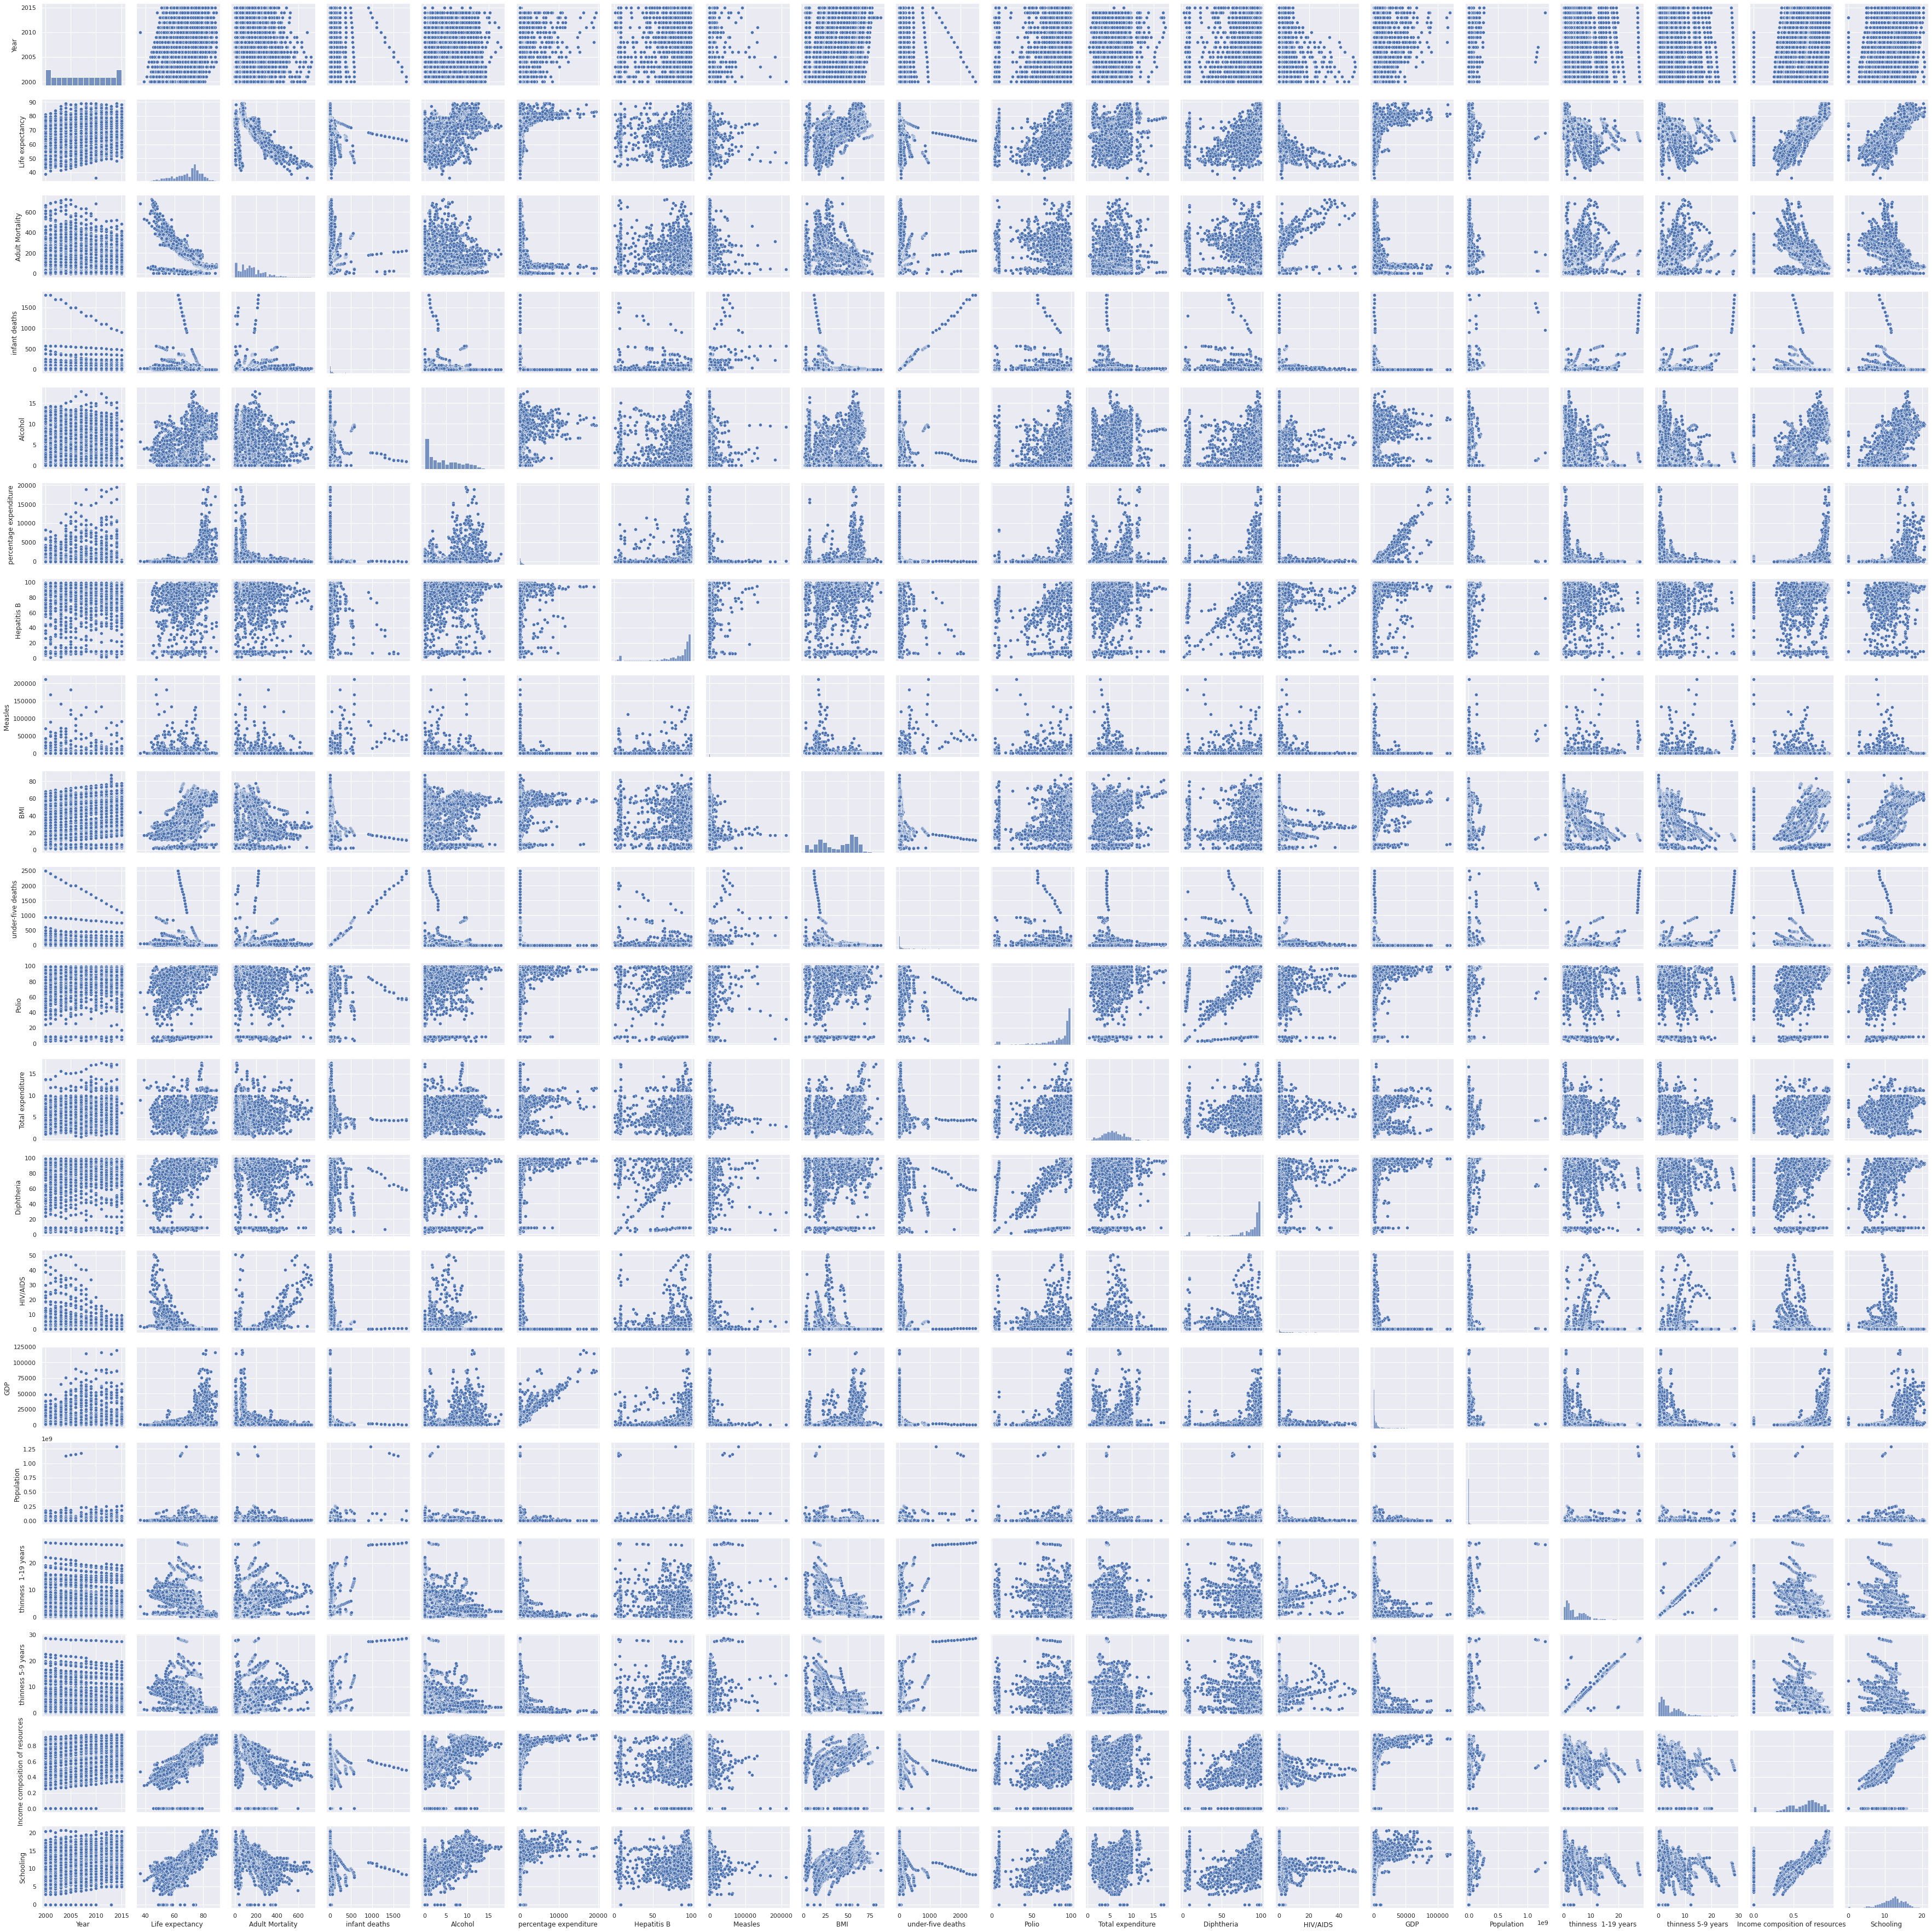

In [15]:
sns.pairplot(df.toPandas())

<AxesSubplot:ylabel='Life expectancy '>

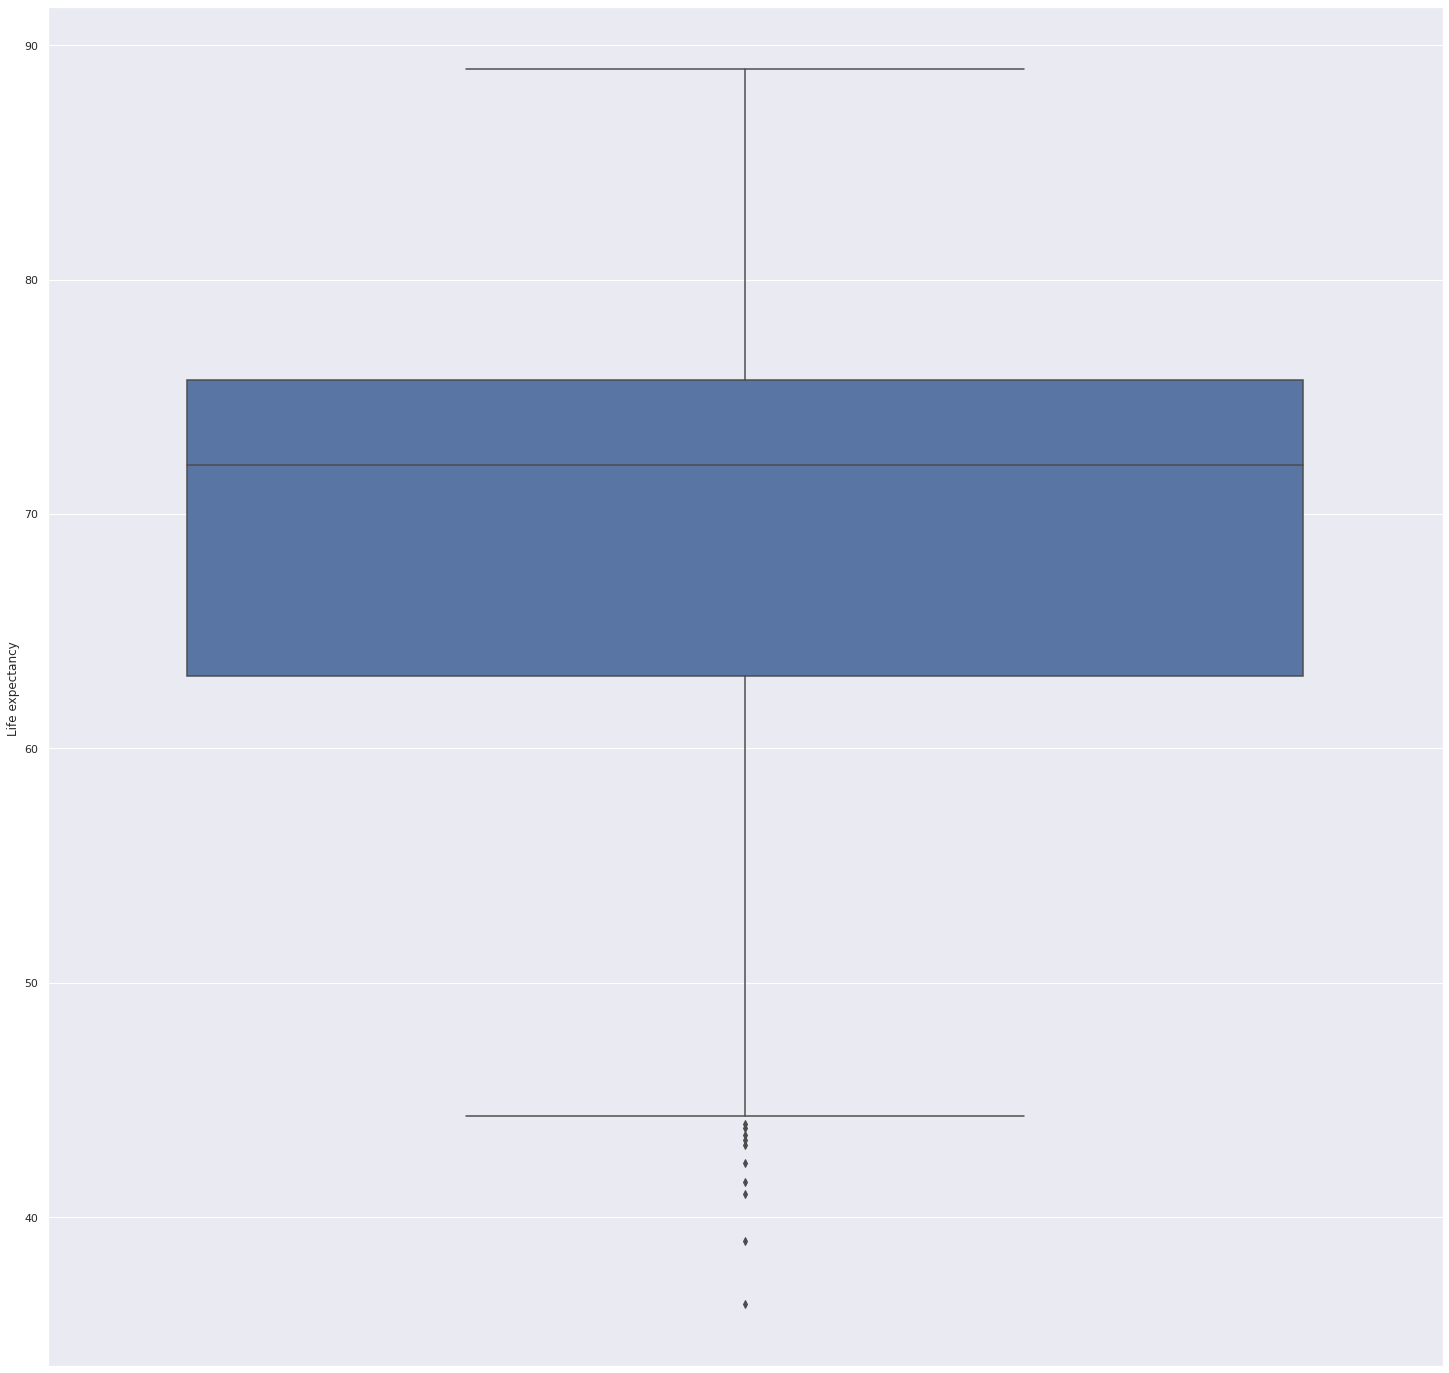

In [16]:
sns.boxplot(y=df.toPandas()['Life expectancy '])

<AxesSubplot:ylabel='Hepatitis B'>

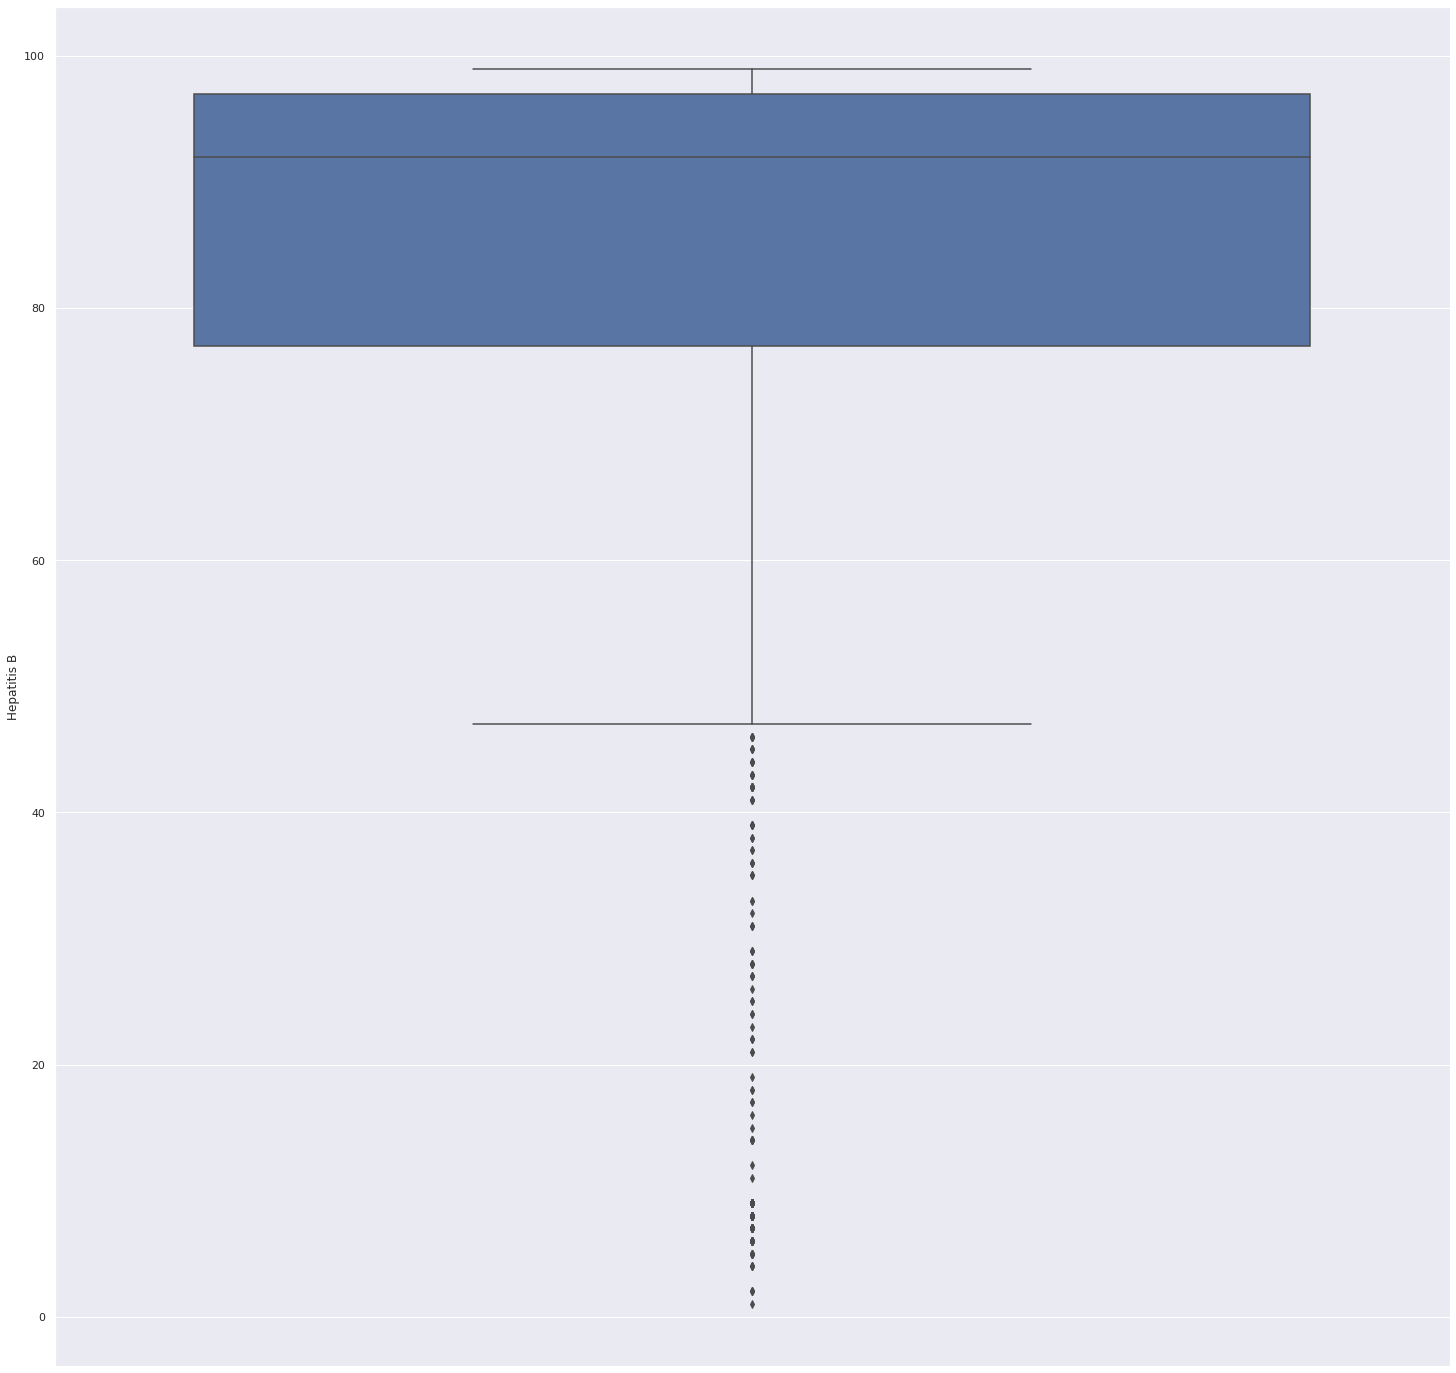

In [17]:
sns.boxplot(y=df.toPandas()['Hepatitis B'])

<AxesSubplot:ylabel='Measles '>

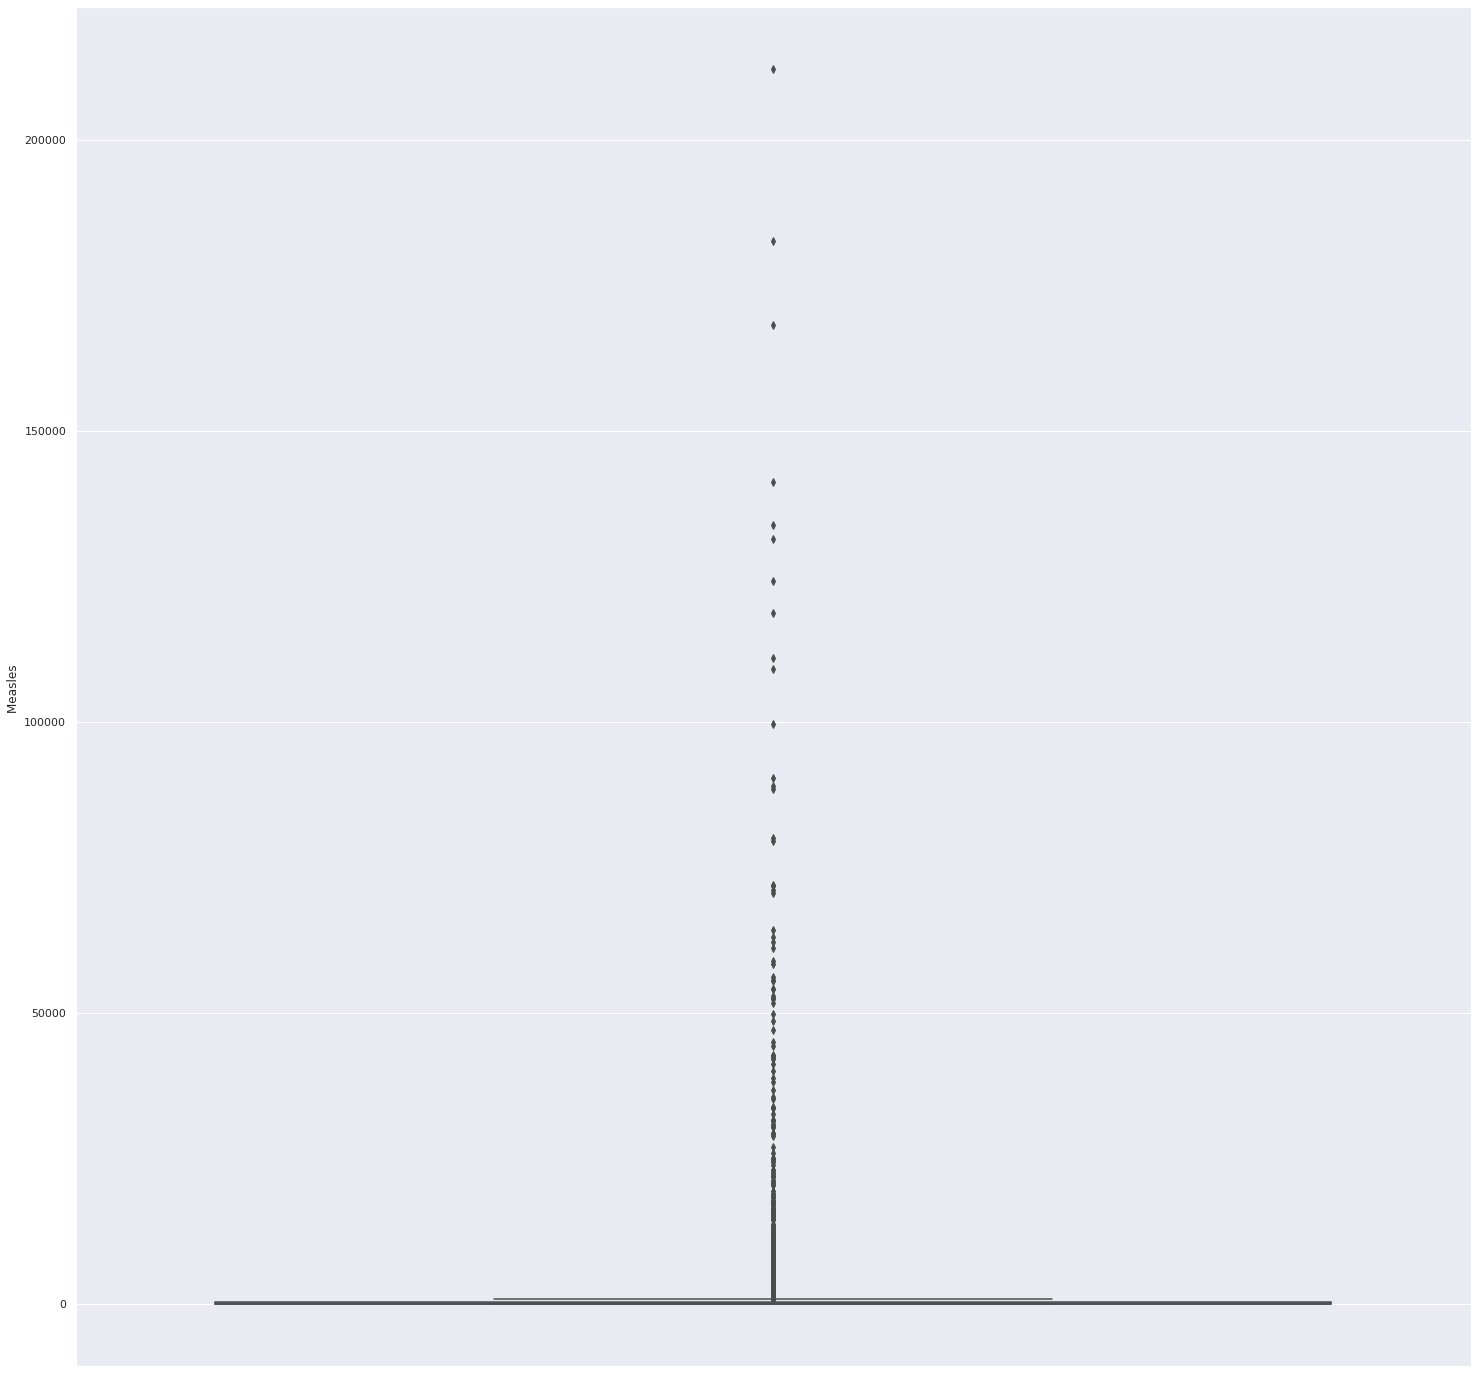

In [18]:
sns.boxplot(y=df.toPandas()['Measles '])

<AxesSubplot:ylabel='Polio'>

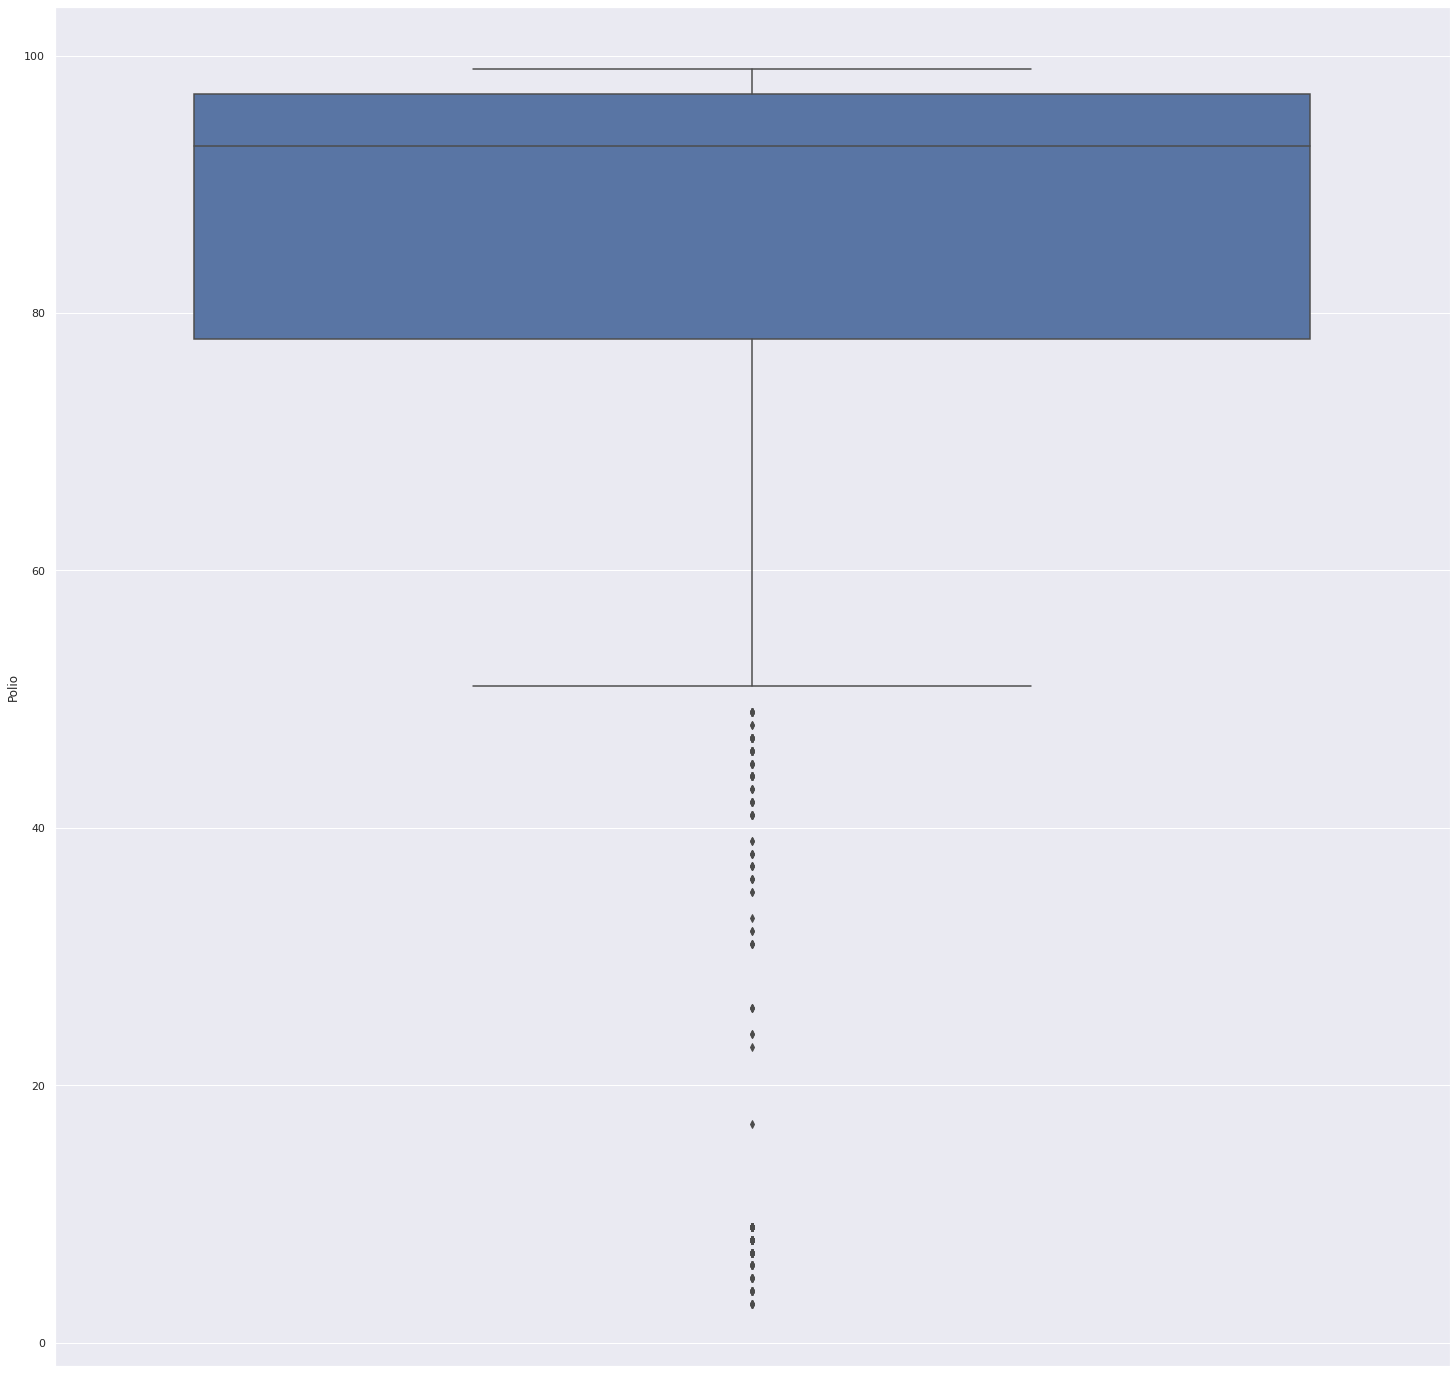

In [19]:
sns.boxplot(y=df.toPandas()['Polio'])

<AxesSubplot:ylabel='Diphtheria '>

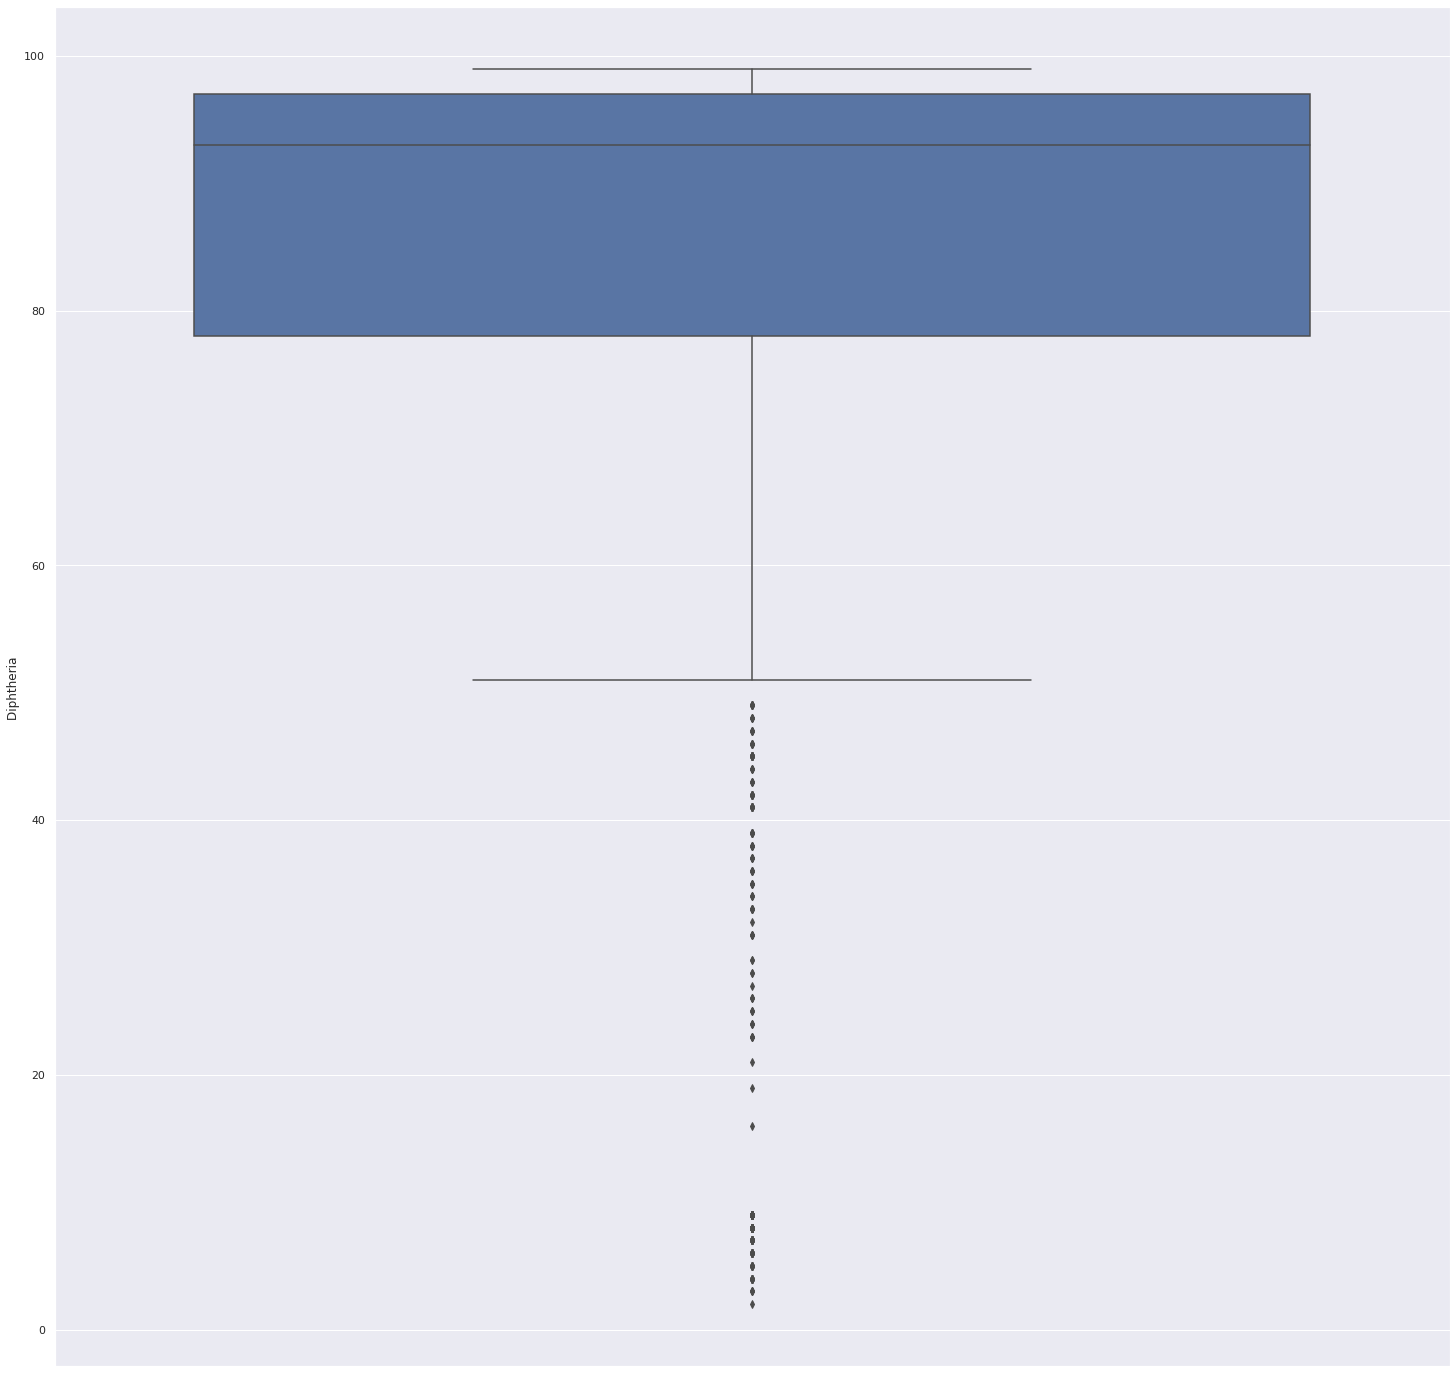

In [20]:
sns.boxplot(y=df.toPandas()['Diphtheria '])

<AxesSubplot:ylabel=' HIV/AIDS'>

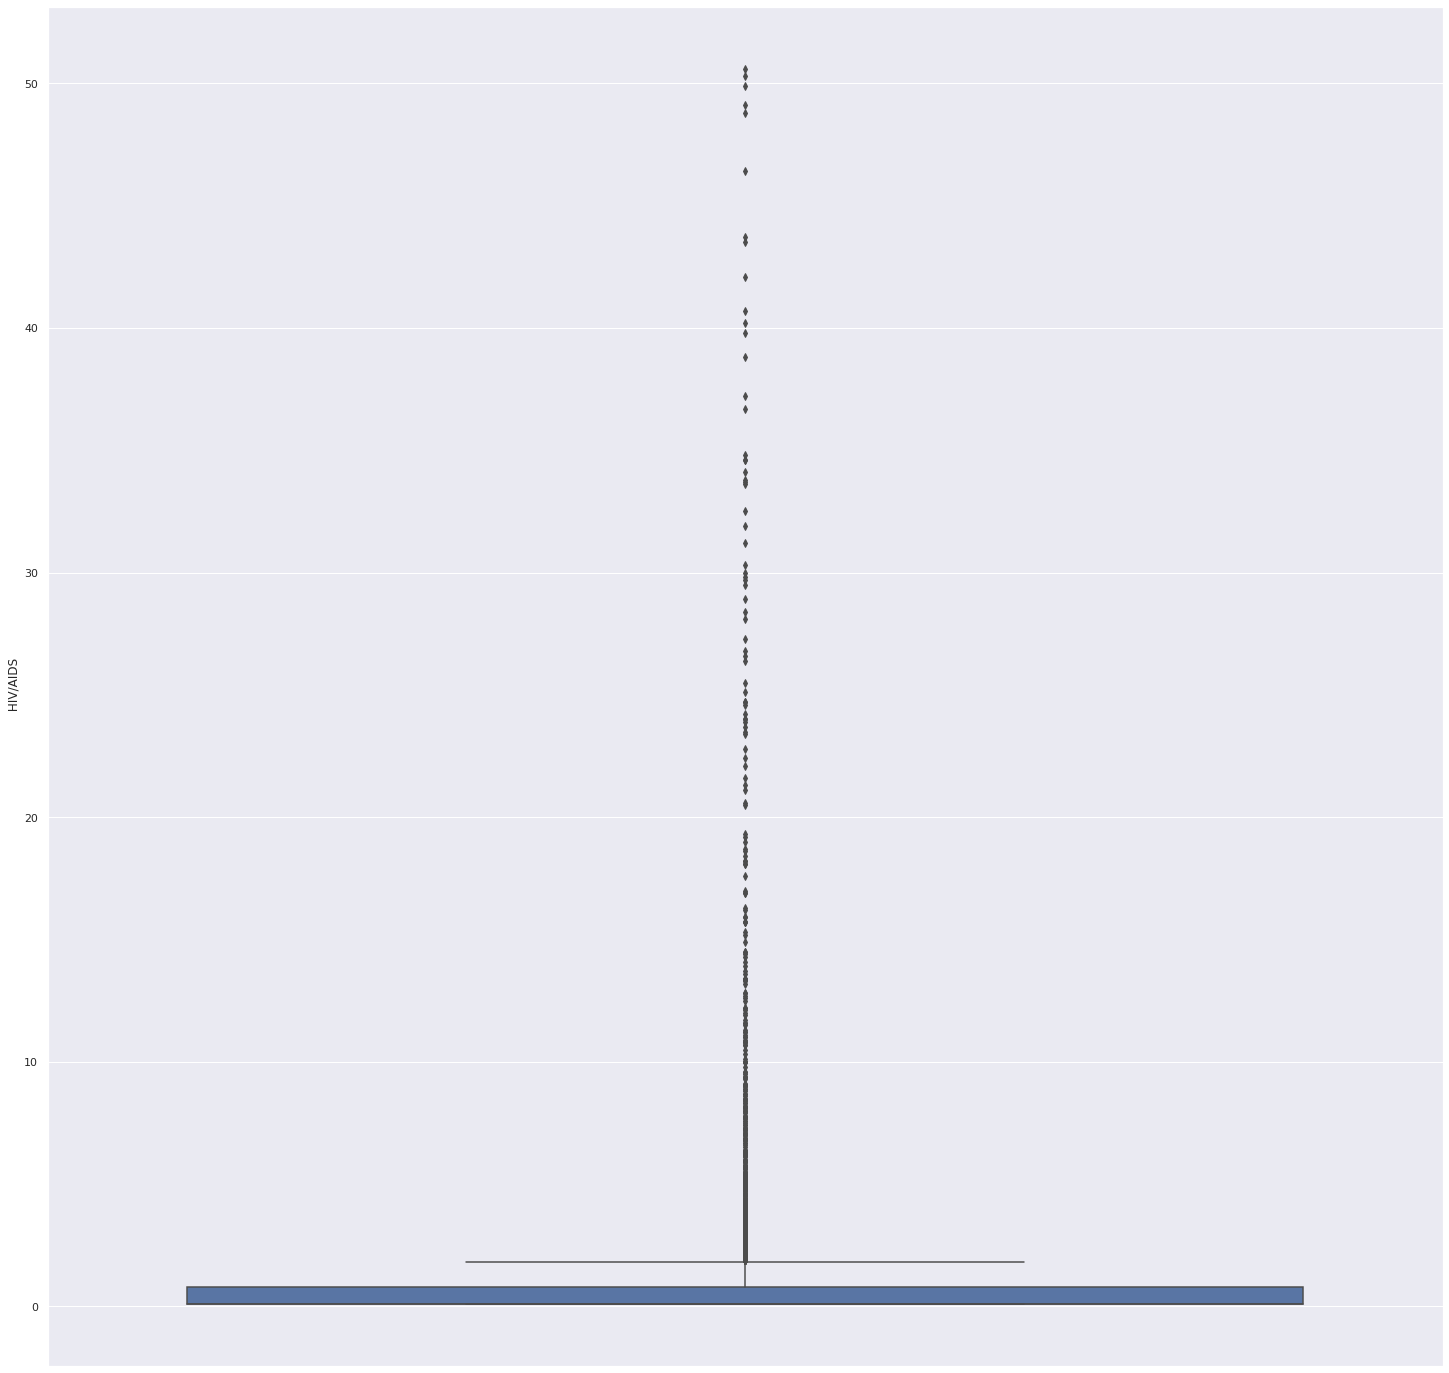

In [21]:
sns.boxplot(y=df.toPandas()[' HIV/AIDS'])

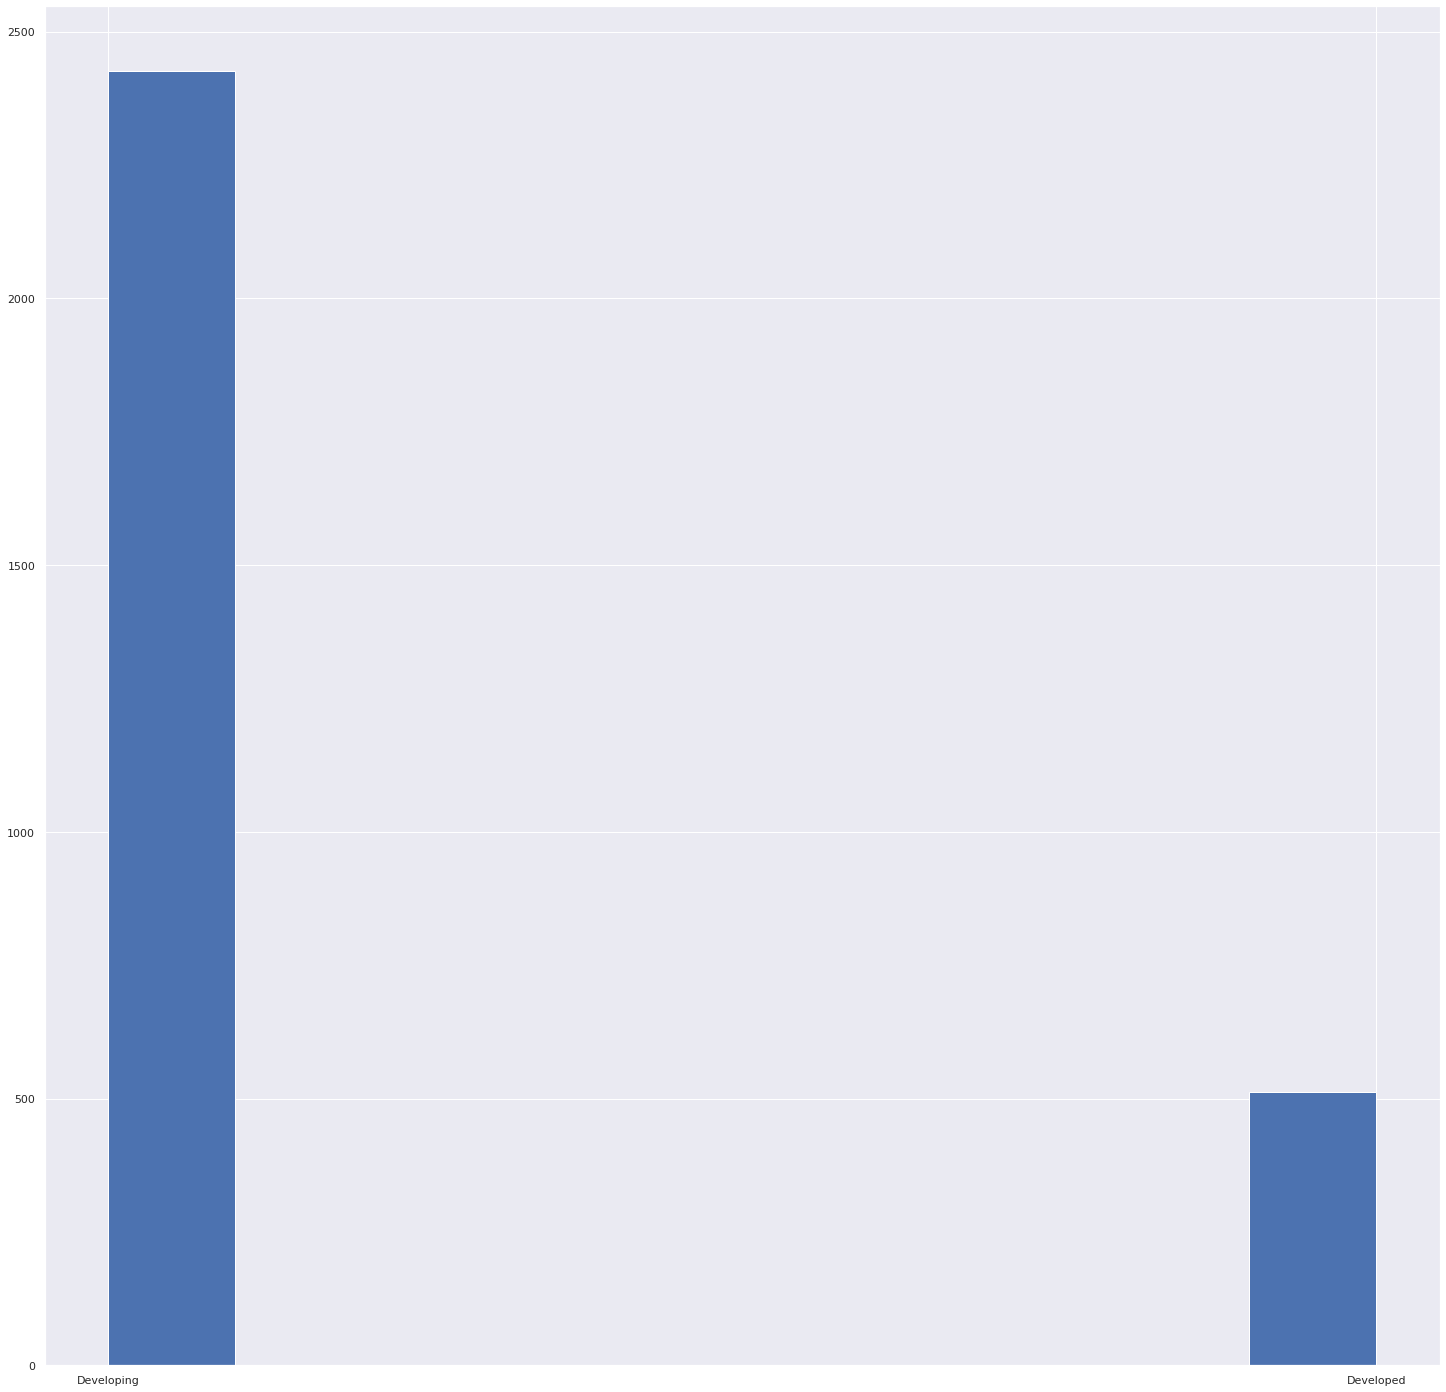

In [22]:
stateHis = np.array(df.select('Status').collect())
plt.hist(stateHis)
plt.show()

<AxesSubplot:ylabel='Life expectancy '>

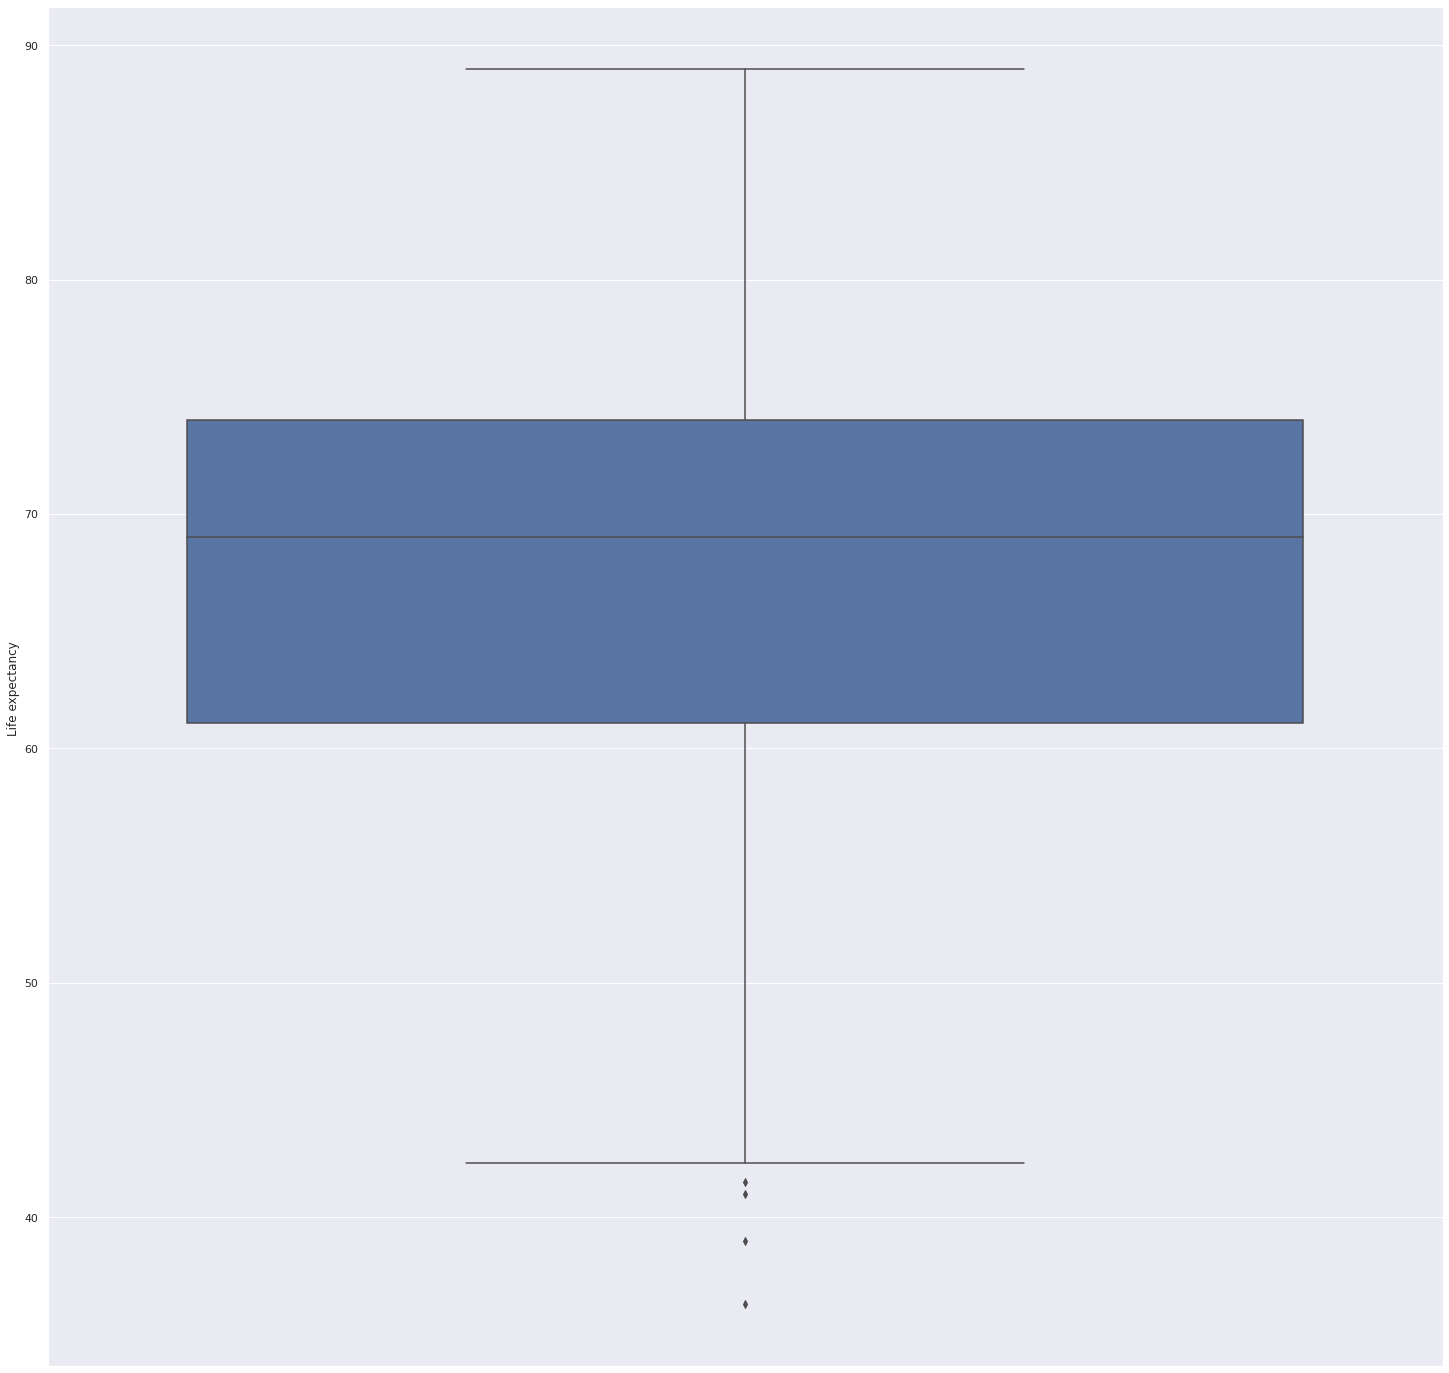

In [23]:
sns.boxplot(y=df_ing.toPandas()['Life expectancy '])

<AxesSubplot:ylabel='Life expectancy '>

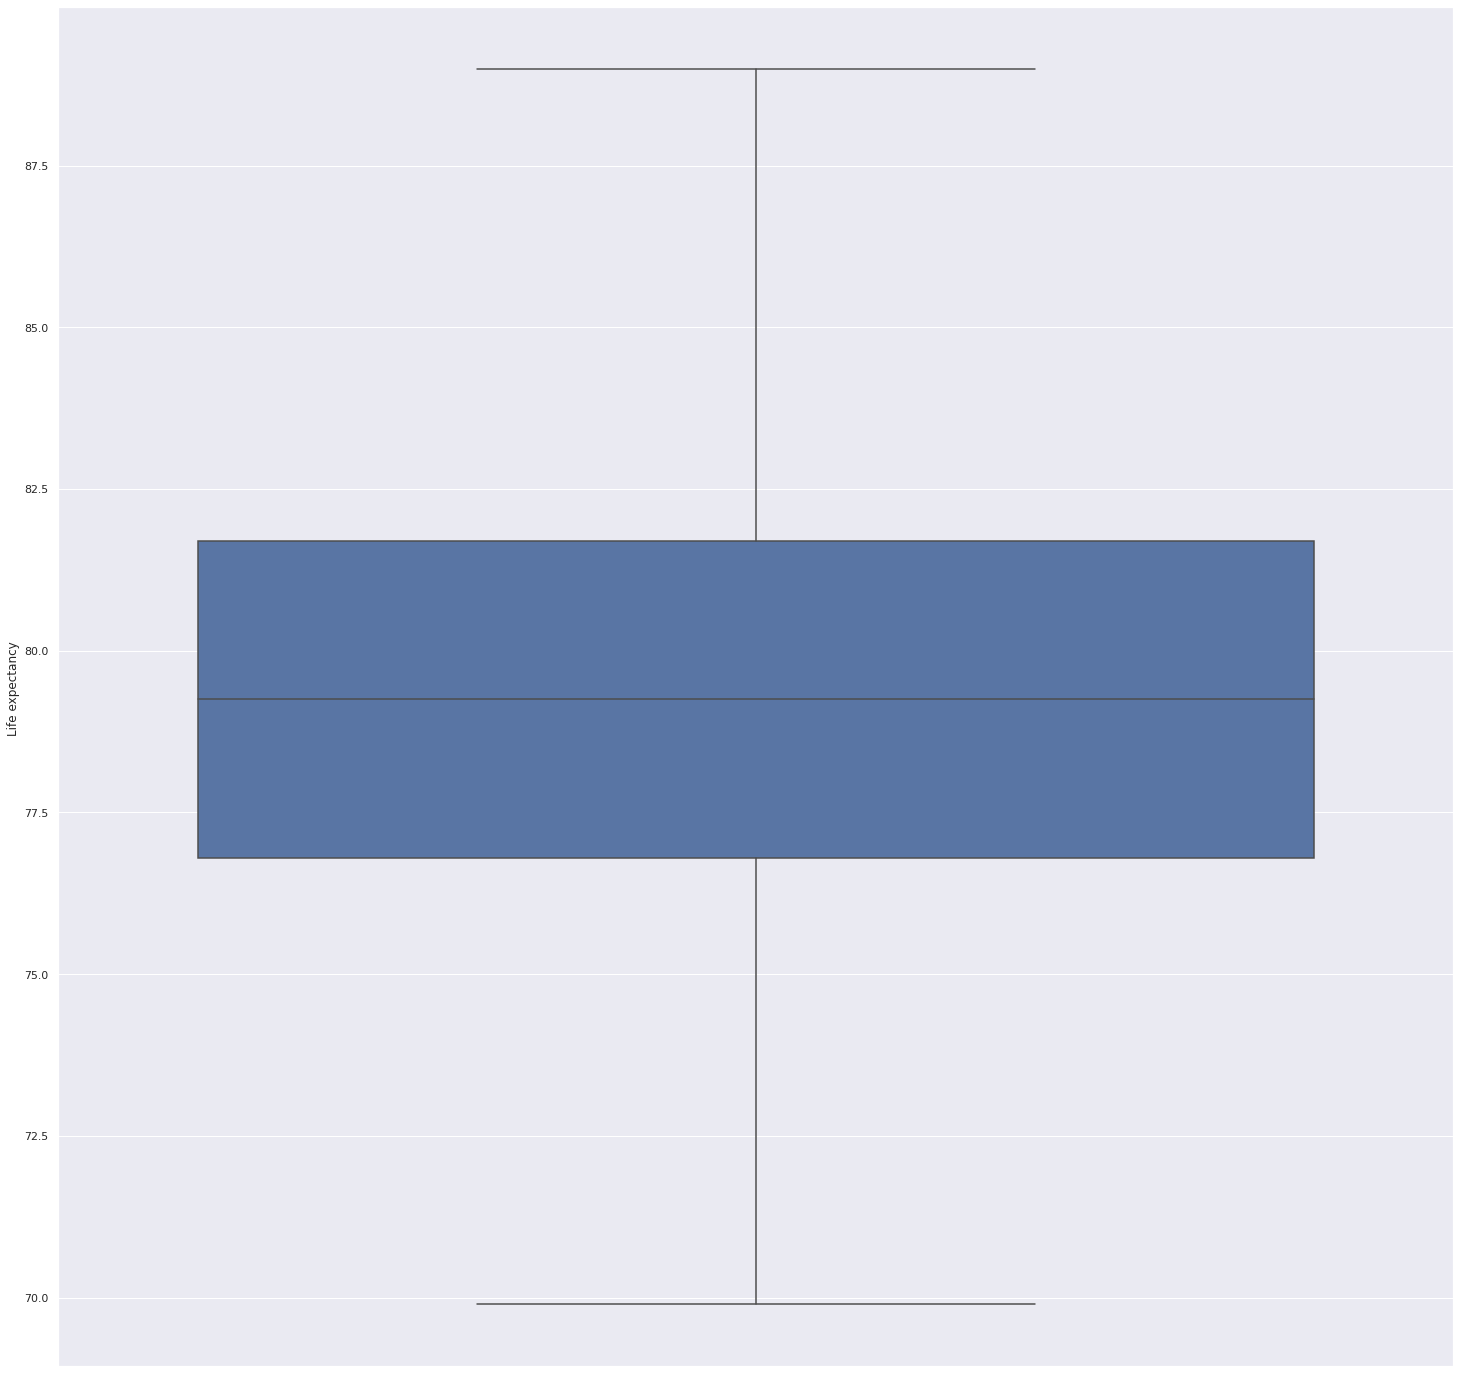

In [24]:
sns.boxplot(y=df_ed.toPandas()['Life expectancy '])

In [25]:
from pyspark.sql.functions import col,isnan,when,count
nullcount = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
nullcount.show()


+-------+----+------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+---+----------+---------------------+-------------------+-------------------------------+---------+
|Country|Year|Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|GDP|Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+-------+----+------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+---+----------+---------------------+-------------------+-------------------------------+---------+
|      0|   0|     0|              10|             10|            0|    194|                     0|        553|       0|   34| 

In [26]:
# Drops a row if a value from a life expectancy is missing.- 10 rows should be droped
df1=df.na.drop(subset='Life expectancy ')
nullcount2 = df1.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df1.columns])
nullcount2.show()


+-------+----+------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+---+----------+---------------------+-------------------+-------------------------------+---------+
|Country|Year|Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|GDP|Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+-------+----+------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+---+----------+---------------------+-------------------+-------------------------------+---------+
|      0|   0|     0|               0|              0|            0|    193|                     0|        553|       0|   32| 

In [27]:
#import all null to mean value

from pyspark.sql.functions import mean
#import mean value for alcohol df2
mean_al =df1.select(mean(df1['Alcohol'])).collect()
df2=df1.fillna(mean_al[0][0], subset=['Alcohol'])


#import mean value for hepatitis B df3
mean_hb =df2.select(mean(df2['Hepatitis B'])).collect()
df3=df2.fillna(mean_hb[0][0], subset=['Hepatitis B'])

#import mean value for bmi df4
mean_bmi =df3.select(mean(df3[' BMI '])).collect()
df4=df3.fillna(mean_bmi[0][0], subset=[' BMI '])

#import mean value for polio df5
mean_polio =df4.select(mean(df4['Polio'])).collect()
df5=df4.fillna(mean_polio[0][0], subset=['Polio'])

#import mean value for 'Total expenditure' df6
mean_te =df5.select(mean(df5['Total expenditure'])).collect()
df6=df5.fillna(mean_te[0][0], subset=['Total expenditure'])

#import mean value for 'Diphtheria ' df7
mean_di =df6.select(mean(df6['Diphtheria '])).collect()
df7=df6.fillna(mean_di[0][0], subset=['Diphtheria '])

#import mean value for 'GDP' df8
mean_gdp =df7.select(mean(df7['GDP'])).collect()
df8=df7.fillna(mean_gdp[0][0], subset=['GDP'])

#import mean value for 'Population' df9
mean_po =df8.select(mean(df8['Population'])).collect()
df9=df8.fillna(mean_po[0][0], subset=['Population'])

#import mean value for ' thinness  1-19 years' df10
mean_th1 =df9.select(mean(df9[' thinness  1-19 years'])).collect()
df10=df9.fillna(mean_th1[0][0], subset=[' thinness  1-19 years'])

#import mean value for ' thinness 5-9 years' df11
mean_th2 =df10.select(mean(df10[' thinness 5-9 years'])).collect()
df11=df10.fillna(mean_th2[0][0], subset=[' thinness 5-9 years'])

#import mean value for 'GDP' df12
mean_icor =df11.select(mean(df11['Income composition of resources'])).collect()
df12=df11.fillna(mean_icor[0][0], subset=['Income composition of resources'])

#import mean value for 'Schooling' df13
mean_schooling =df12.select(mean(df12['Schooling'])).collect()
df_cleanup=df12.fillna(mean_schooling[0][0], subset=['Schooling'])

In [28]:
nullcount3 = df_cleanup.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df_cleanup.columns])
nullcount3.show()

+-------+----+------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+---+----------+---------------------+-------------------+-------------------------------+---------+
|Country|Year|Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|GDP|Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+-------+----+------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+---+----------+---------------------+-------------------+-------------------------------+---------+
|      0|   0|     0|               0|              0|            0|      0|                     0|          0|       0|    0| 

df_cleanup

<AxesSubplot:>

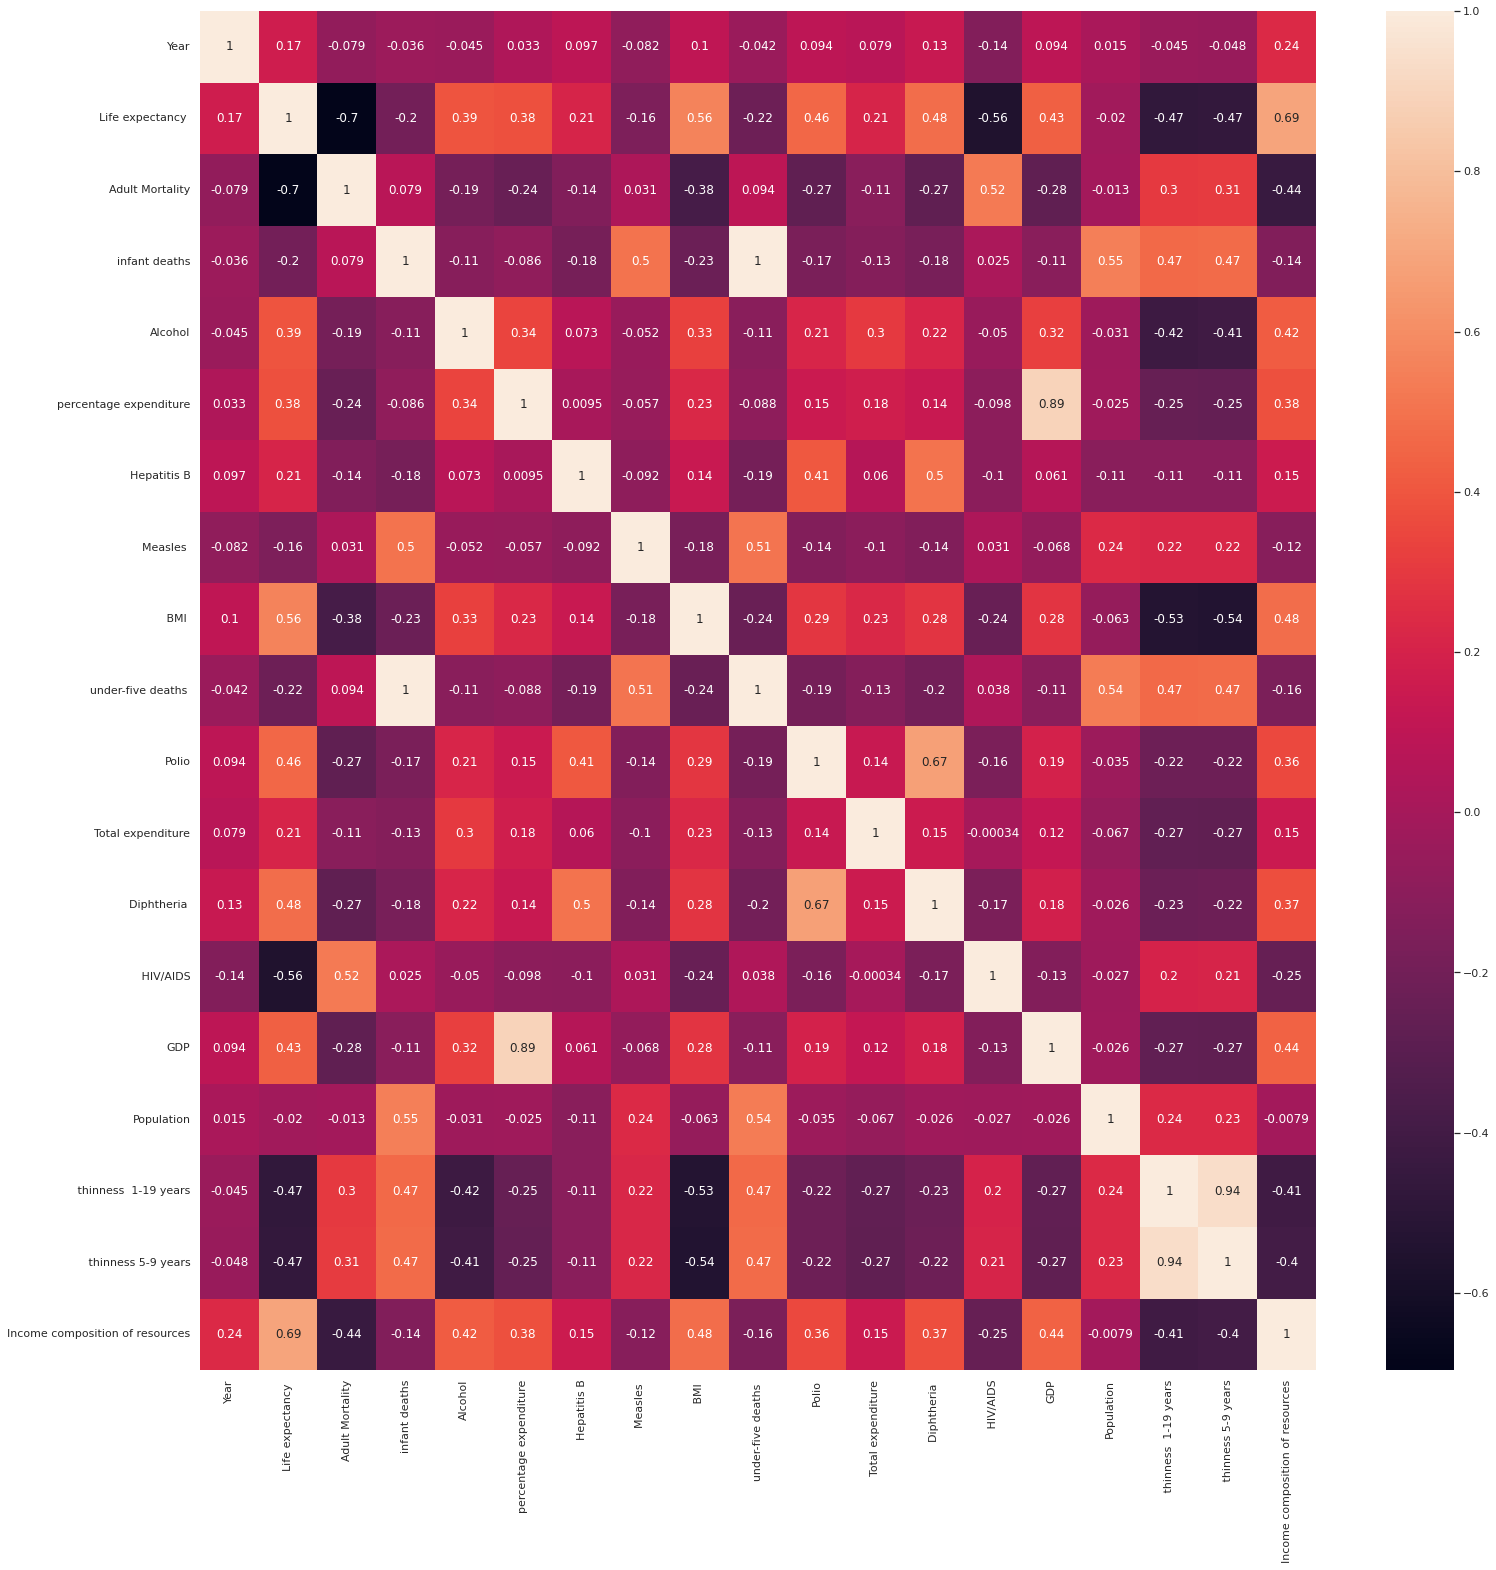

In [29]:
sns.set(rc={'figure.figsize':(25,25)})
corr2=df_cleanup.toPandas().iloc[:,:21].corr()
sns.heatmap(corr2, annot=True)

In [30]:
#sns.pairplot(df_cleanup.toPandas())

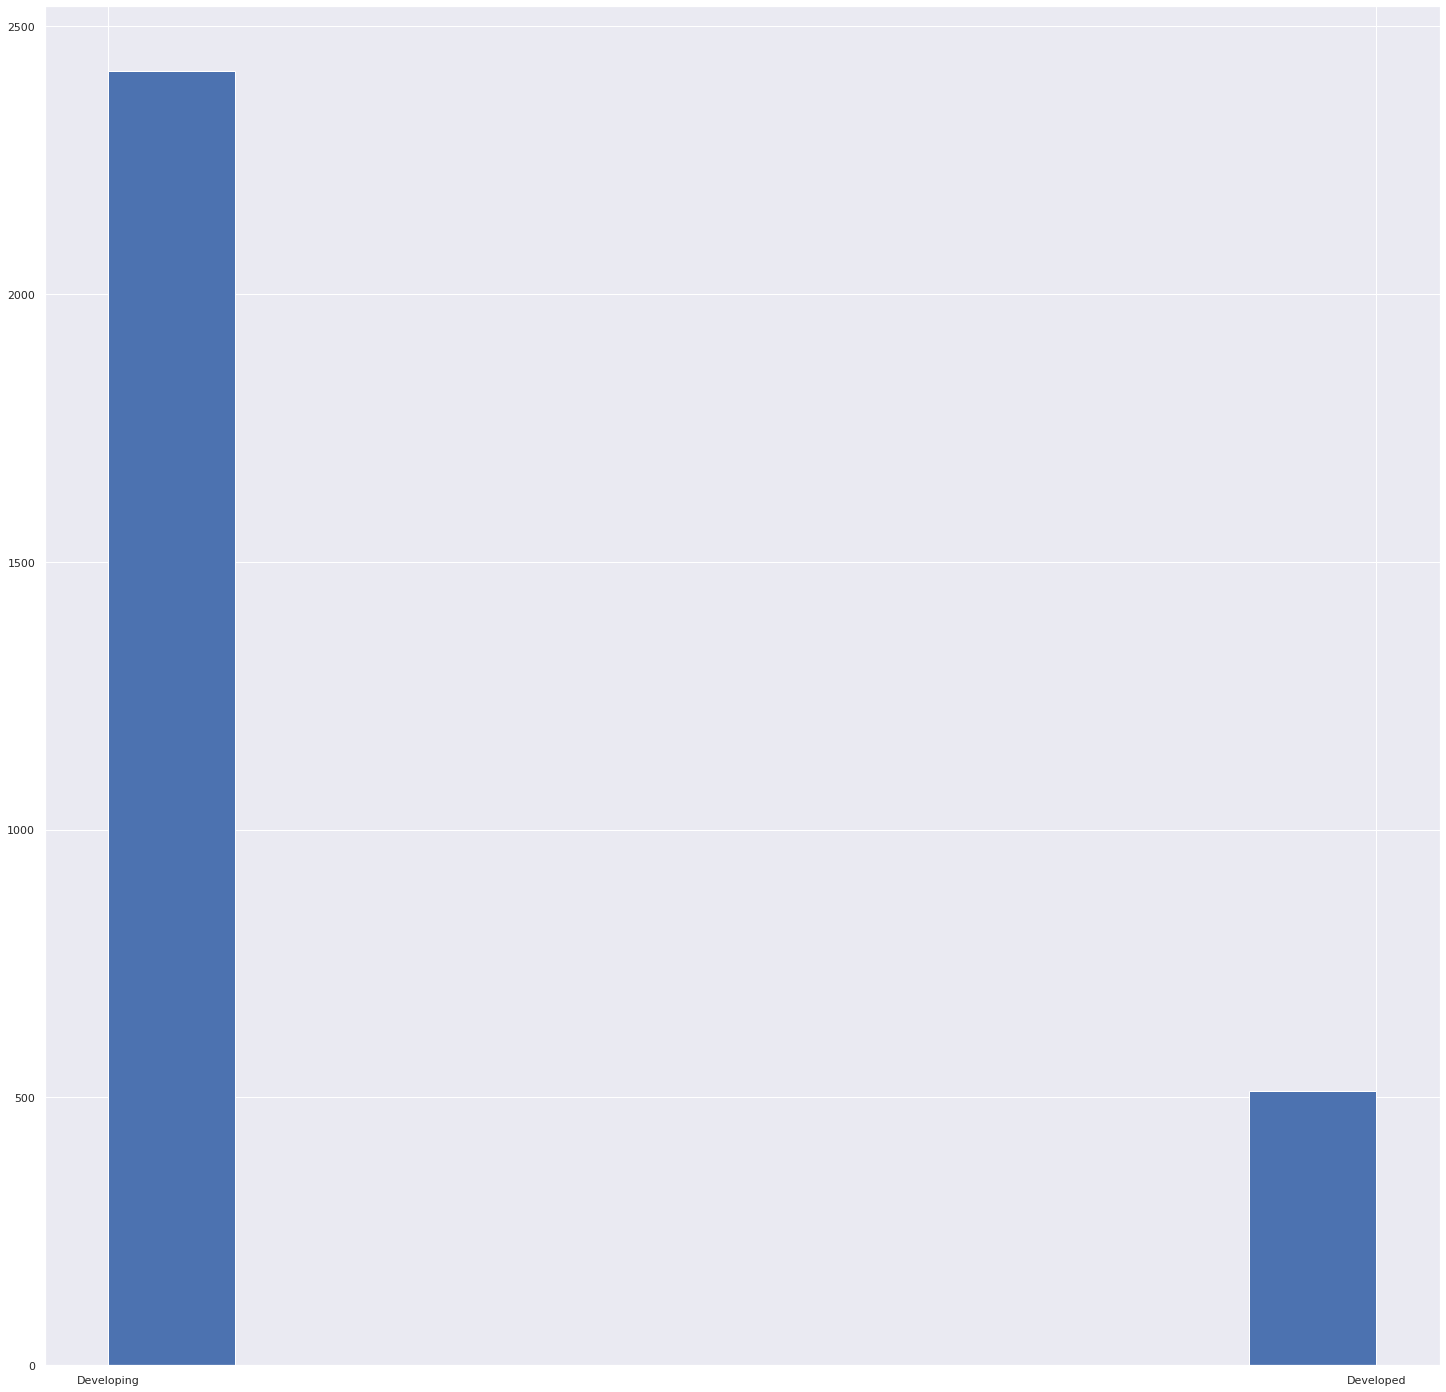

In [31]:
stateHis2 = np.array(df_cleanup.select('Status').collect())
plt.hist(stateHis2)
plt.show()

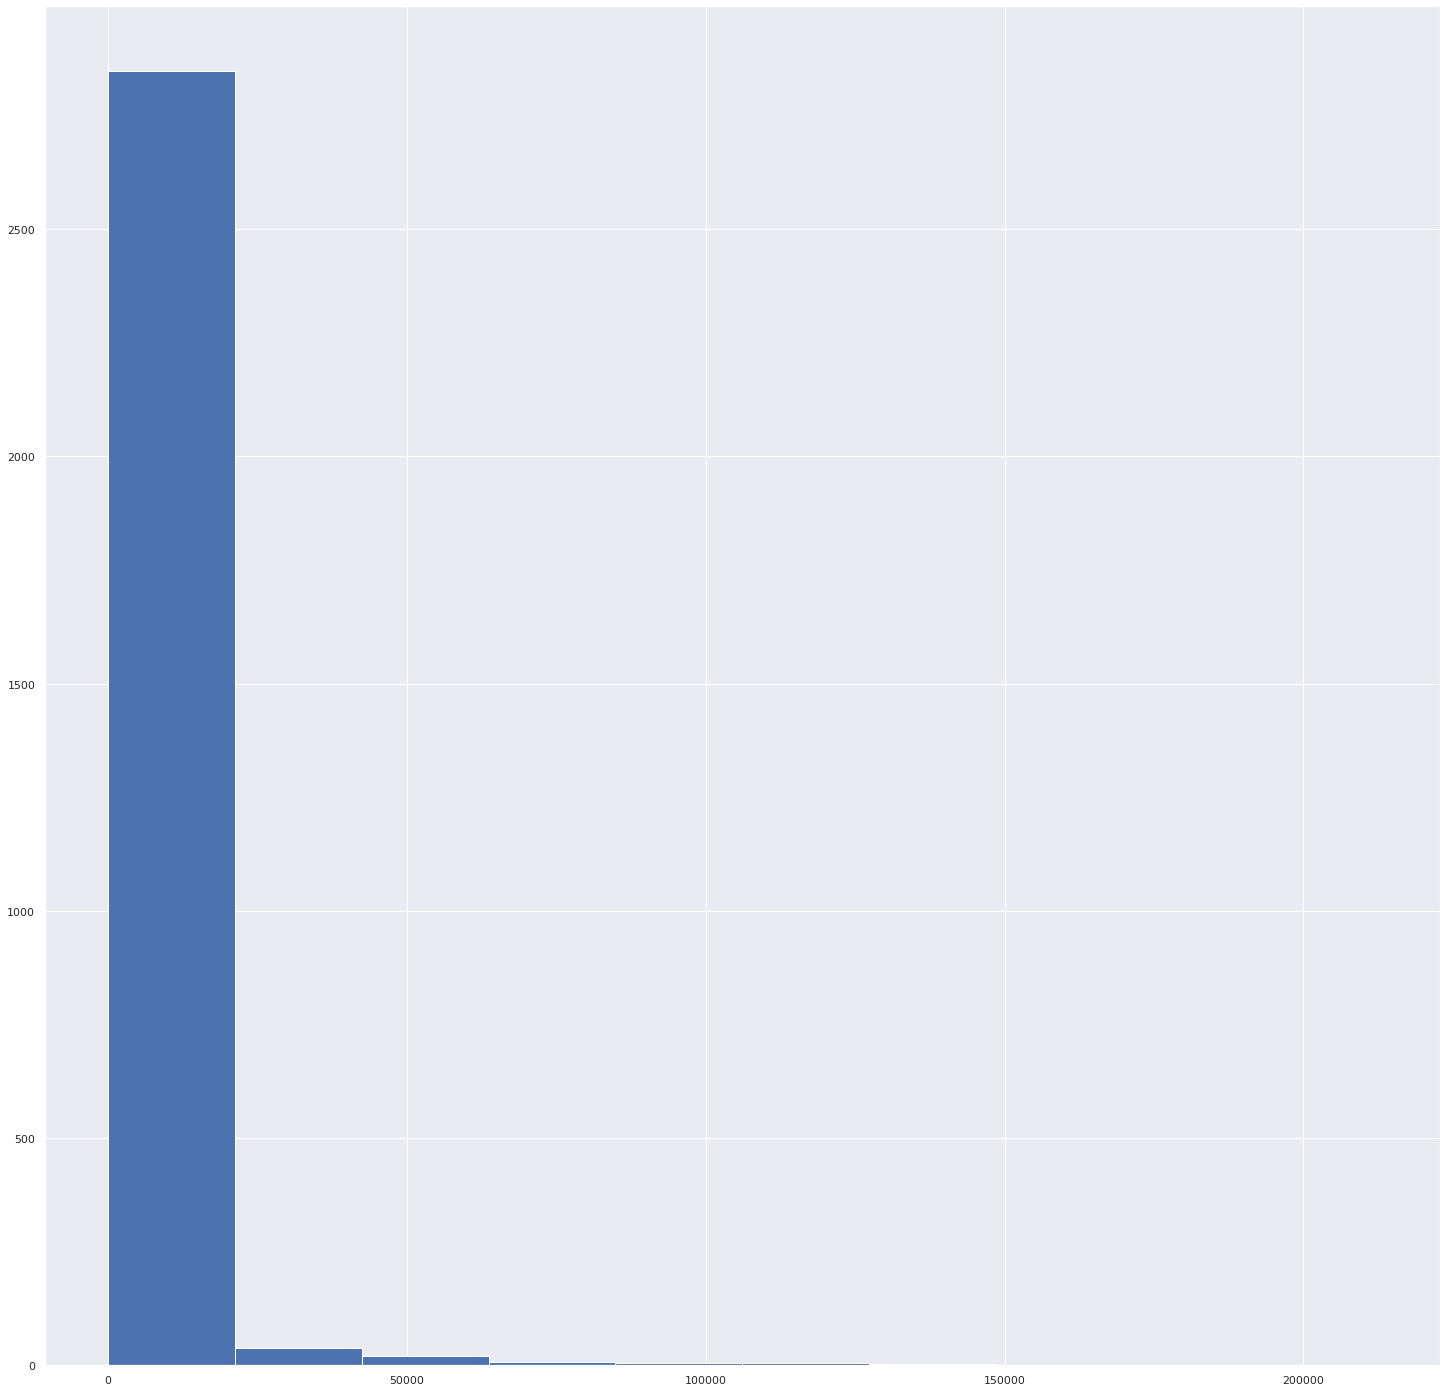

In [32]:
measlesArr = np.array(df_cleanup.select('Measles ').collect())
plt.hist(measlesArr)
plt.show()

In [33]:
from pyspark.sql import functions as F, Window
lower = 0
upper = 1000

df_cleanup = df_cleanup.withColumn(
    'Measles ', 
    F.when(
        (df['Measles '] < lower) | (df['Measles '] > 850), 
        800
        #F.round(F.mean('Measles ').over(Window.orderBy(F.lit(1)))).cast('int')
        # or you can use 
        #F.round(F.lit(df.select(F.mean(F.col('Measles ')).alias('mean')).collect()[0]['mean'])).cast('int')
    ).otherwise(F.col('Measles '))
)
df_cleanup = df_cleanup.withColumn(
    'infant deaths', 
    F.when(
        (df['infant deaths'] < lower) | (df['infant deaths'] > upper), 
        upper
        #F.round(F.mean('Measles ').over(Window.orderBy(F.lit(1)))).cast('int')
        # or you can use 
        #F.round(F.lit(df.select(F.mean(F.col('Measles ')).alias('mean')).collect()[0]['mean'])).cast('int')
    ).otherwise(F.col('infant deaths'))
)
df_cleanup = df_cleanup.withColumn(
    'under-five deaths ', 
    F.when(
        (df['under-five deaths '] < lower) | (df['under-five deaths '] > upper), 
        upper
        #F.round(F.mean('Measles ').over(Window.orderBy(F.lit(1)))).cast('int')
        # or you can use 
        #F.round(F.lit(df.select(F.mean(F.col('Measles ')).alias('mean')).collect()[0]['mean'])).cast('int')
    ).otherwise(F.col('under-five deaths '))
)




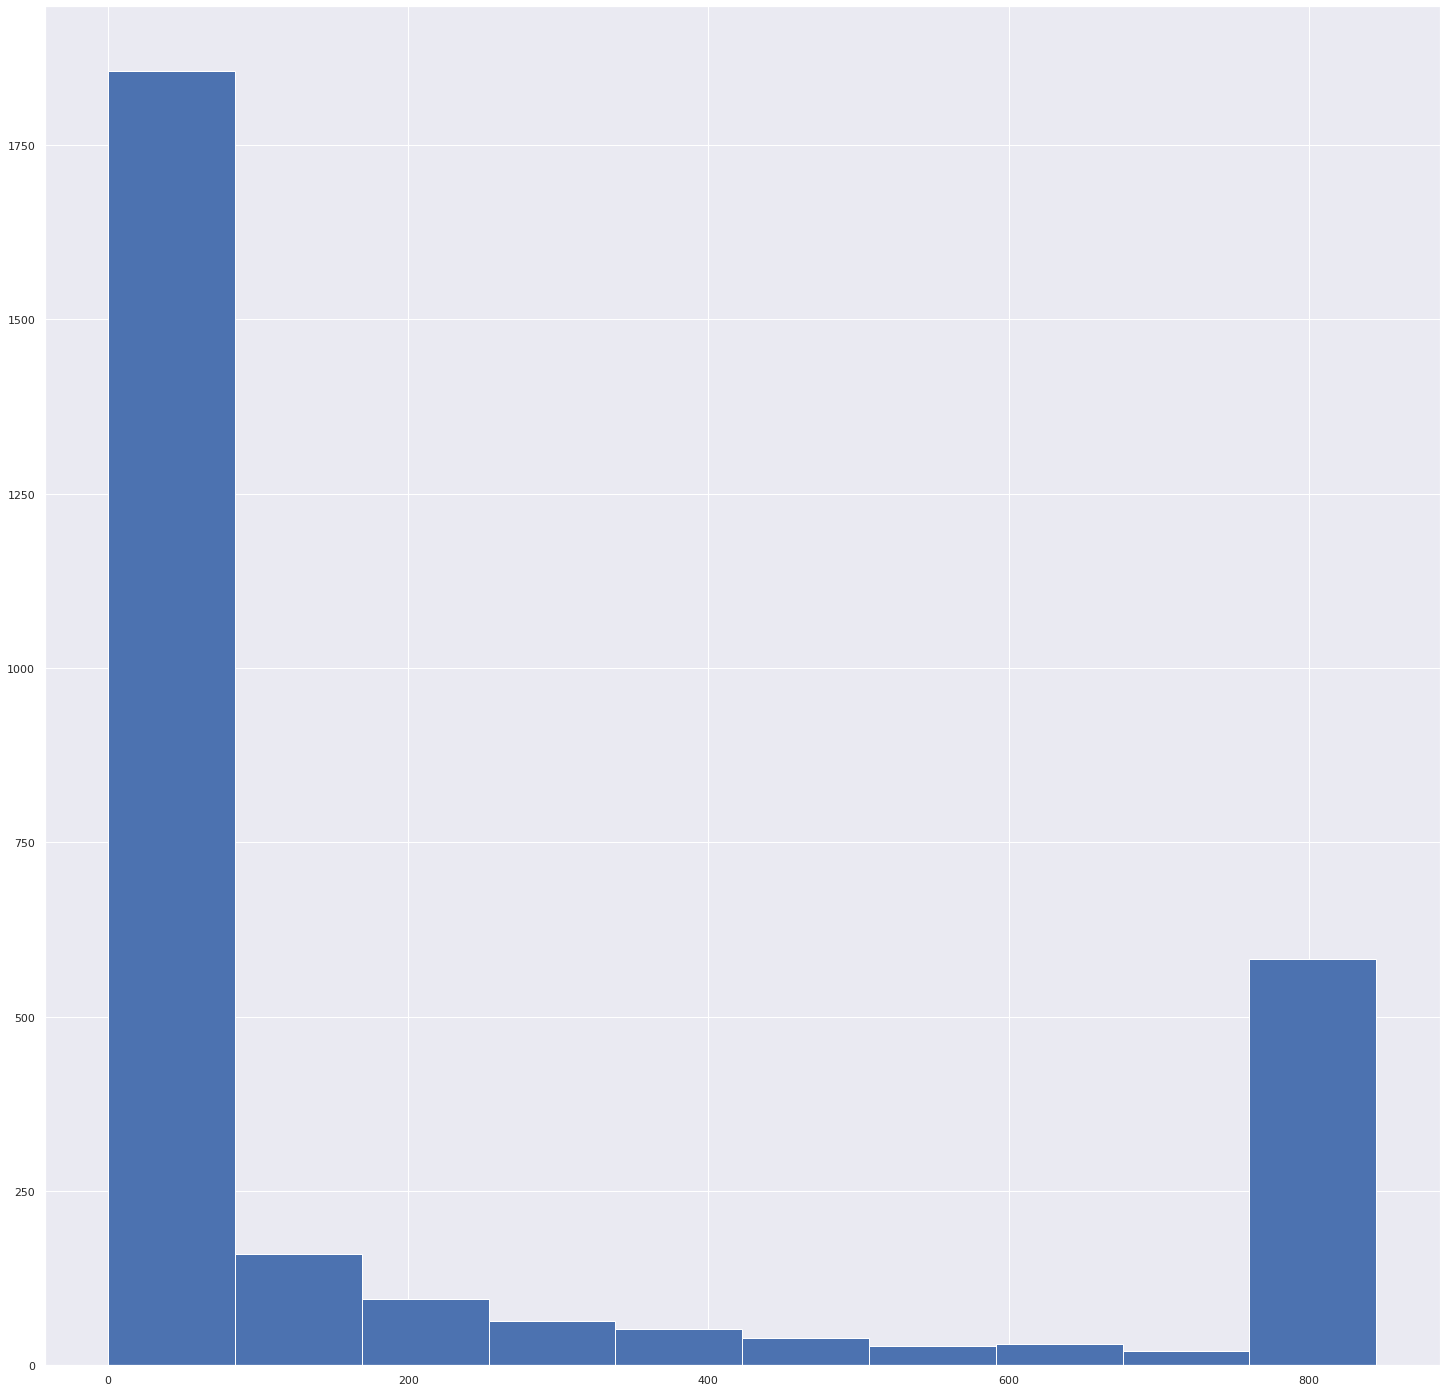

In [34]:
measlesArr2 =np.array(df_cleanup.select('Measles ').collect())
plt.hist(measlesArr2)
plt.show()

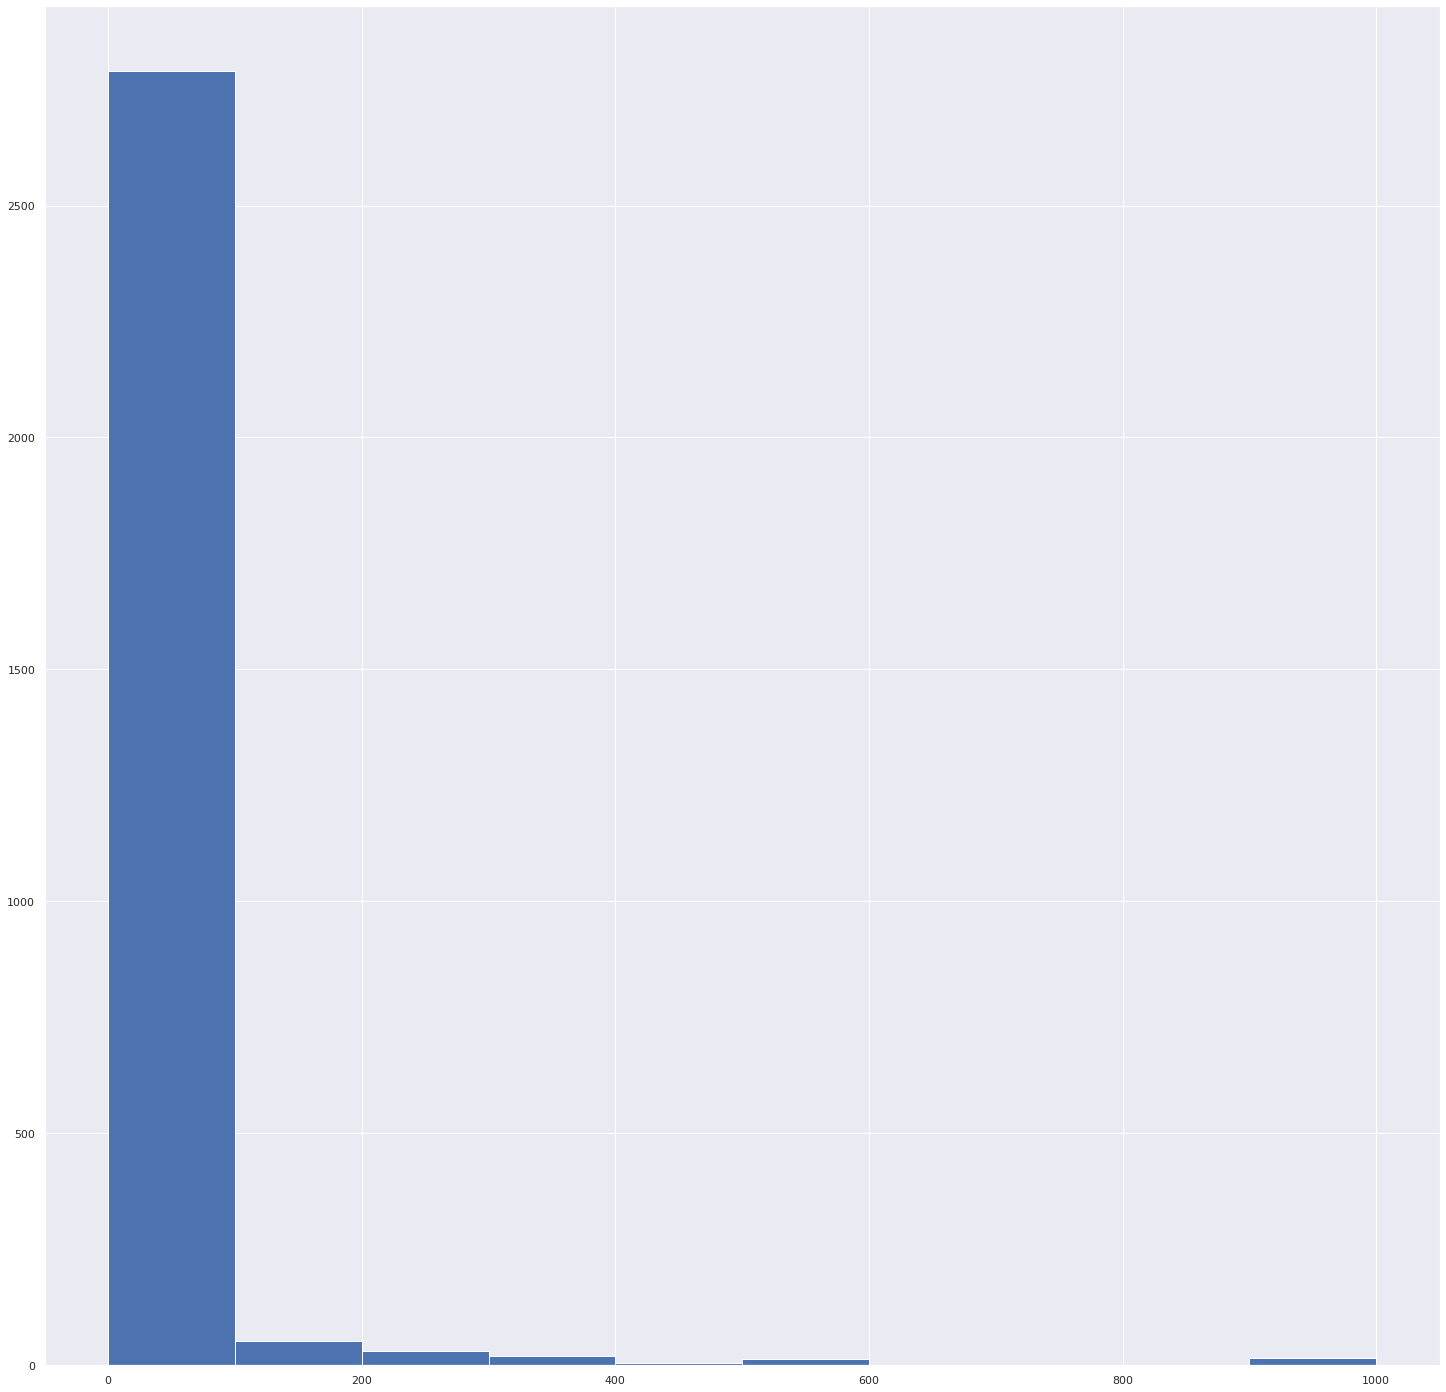

In [35]:
infantArr2 =np.array(df_cleanup.select('infant deaths').collect())
plt.hist(infantArr2)
plt.show()

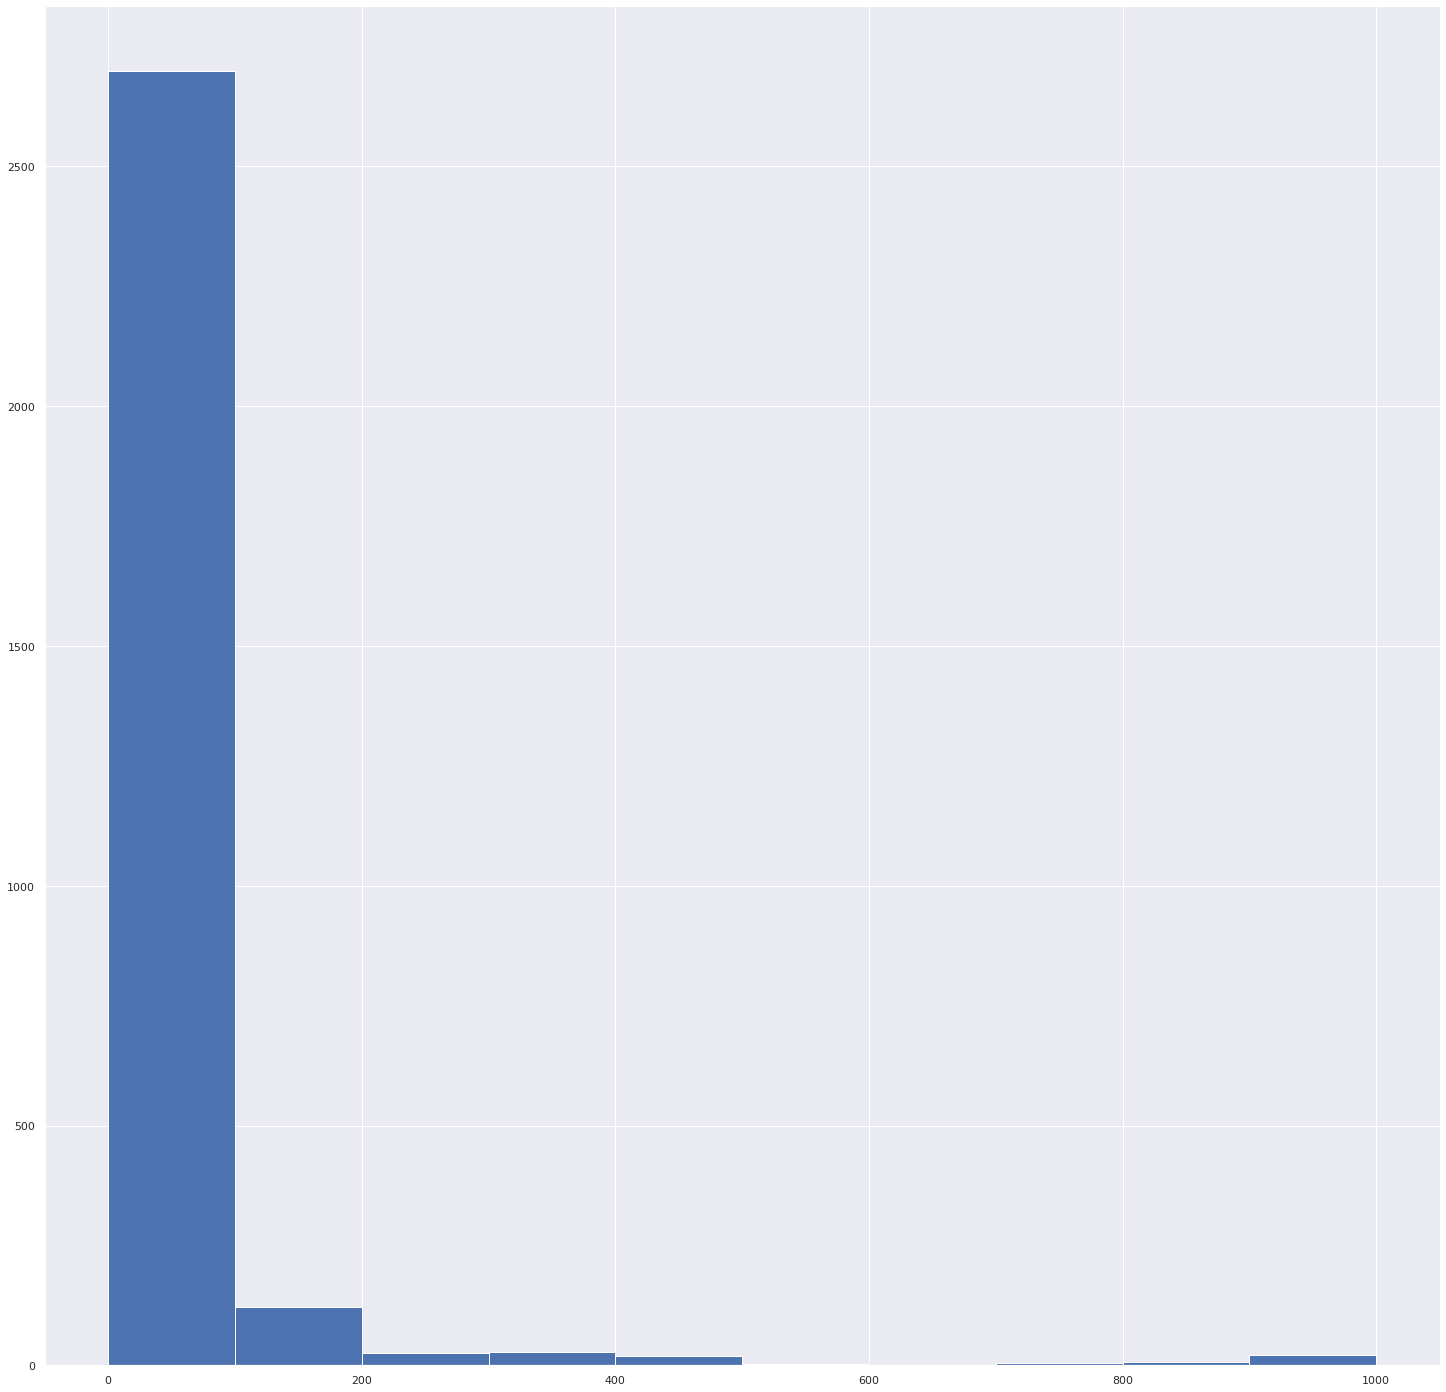

In [36]:
underfiveArr2 =np.array(df_cleanup.select( 'under-five deaths ').collect())
plt.hist(underfiveArr2)
plt.show()

<AxesSubplot:ylabel='Measles '>

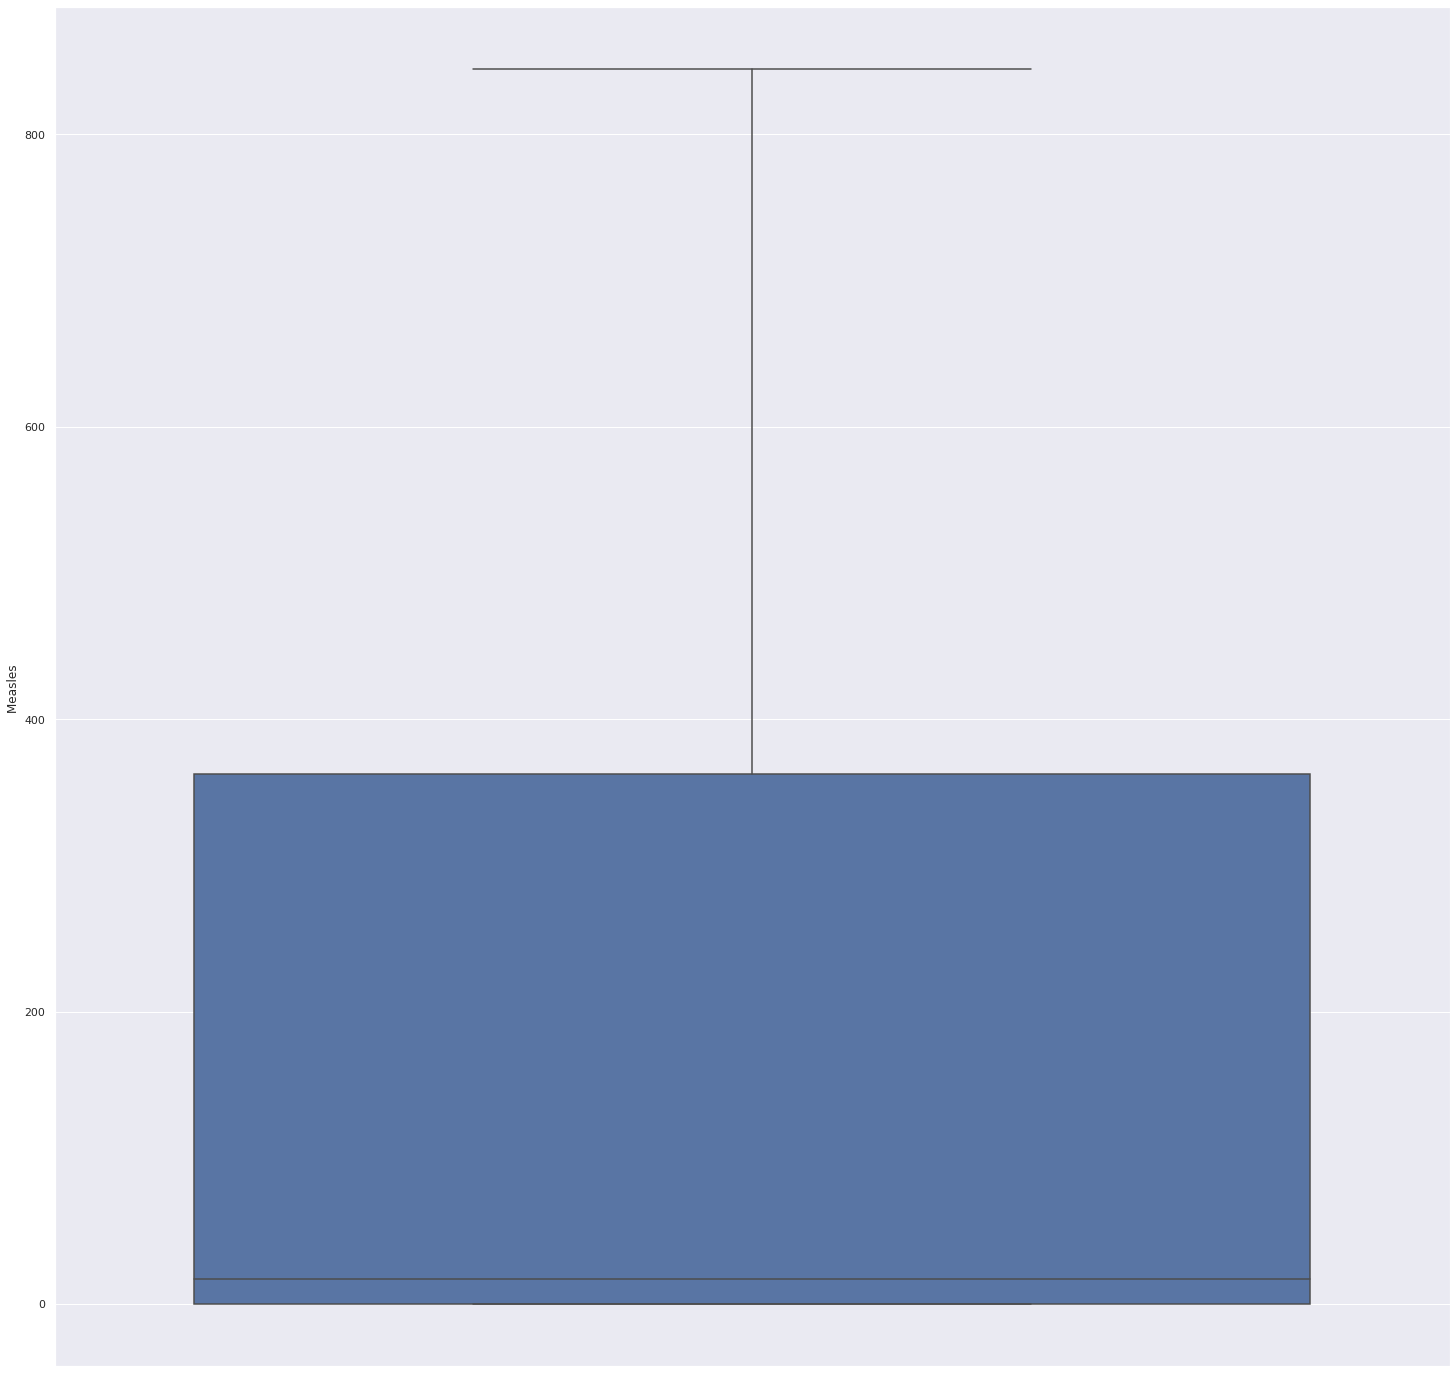

In [37]:
sns.boxplot(y=df_cleanup.toPandas()['Measles '])

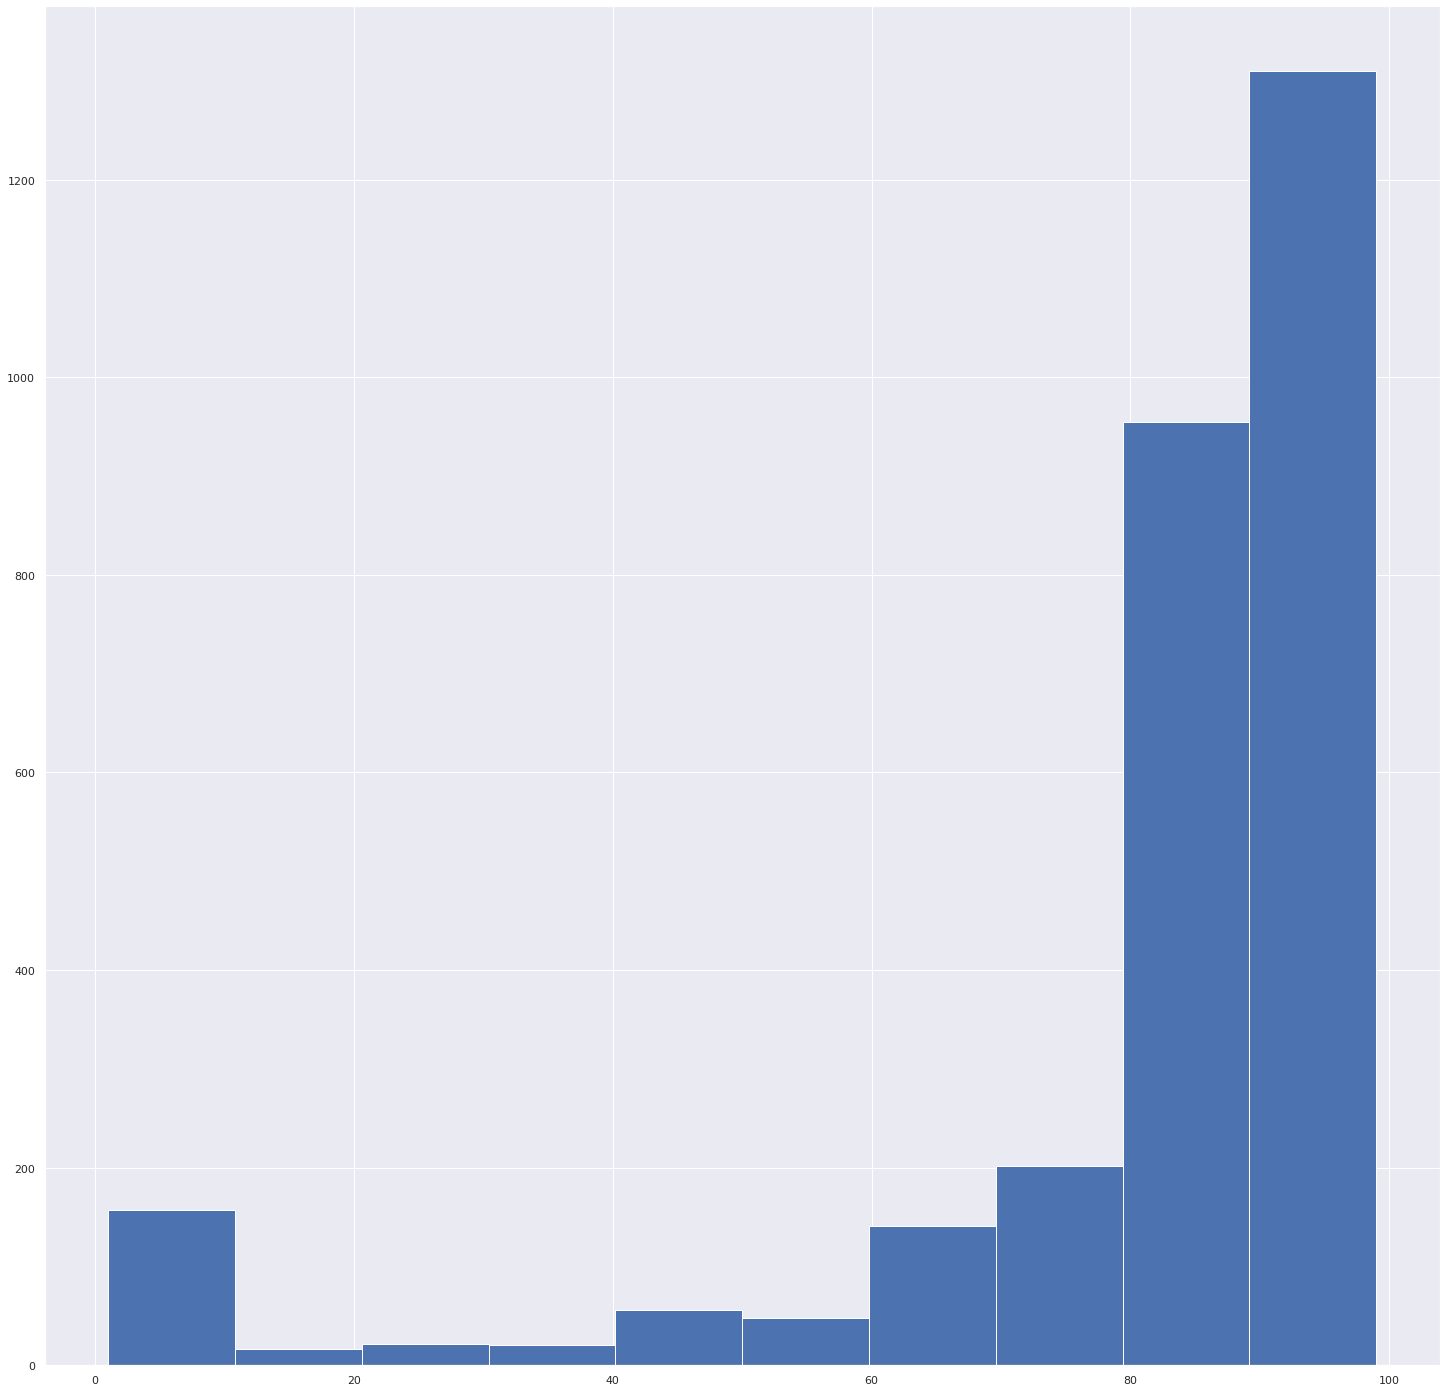

In [38]:
HepatitisBArr = np.array(df_cleanup.select('Hepatitis B').collect())
plt.hist(HepatitisBArr)
plt.show()

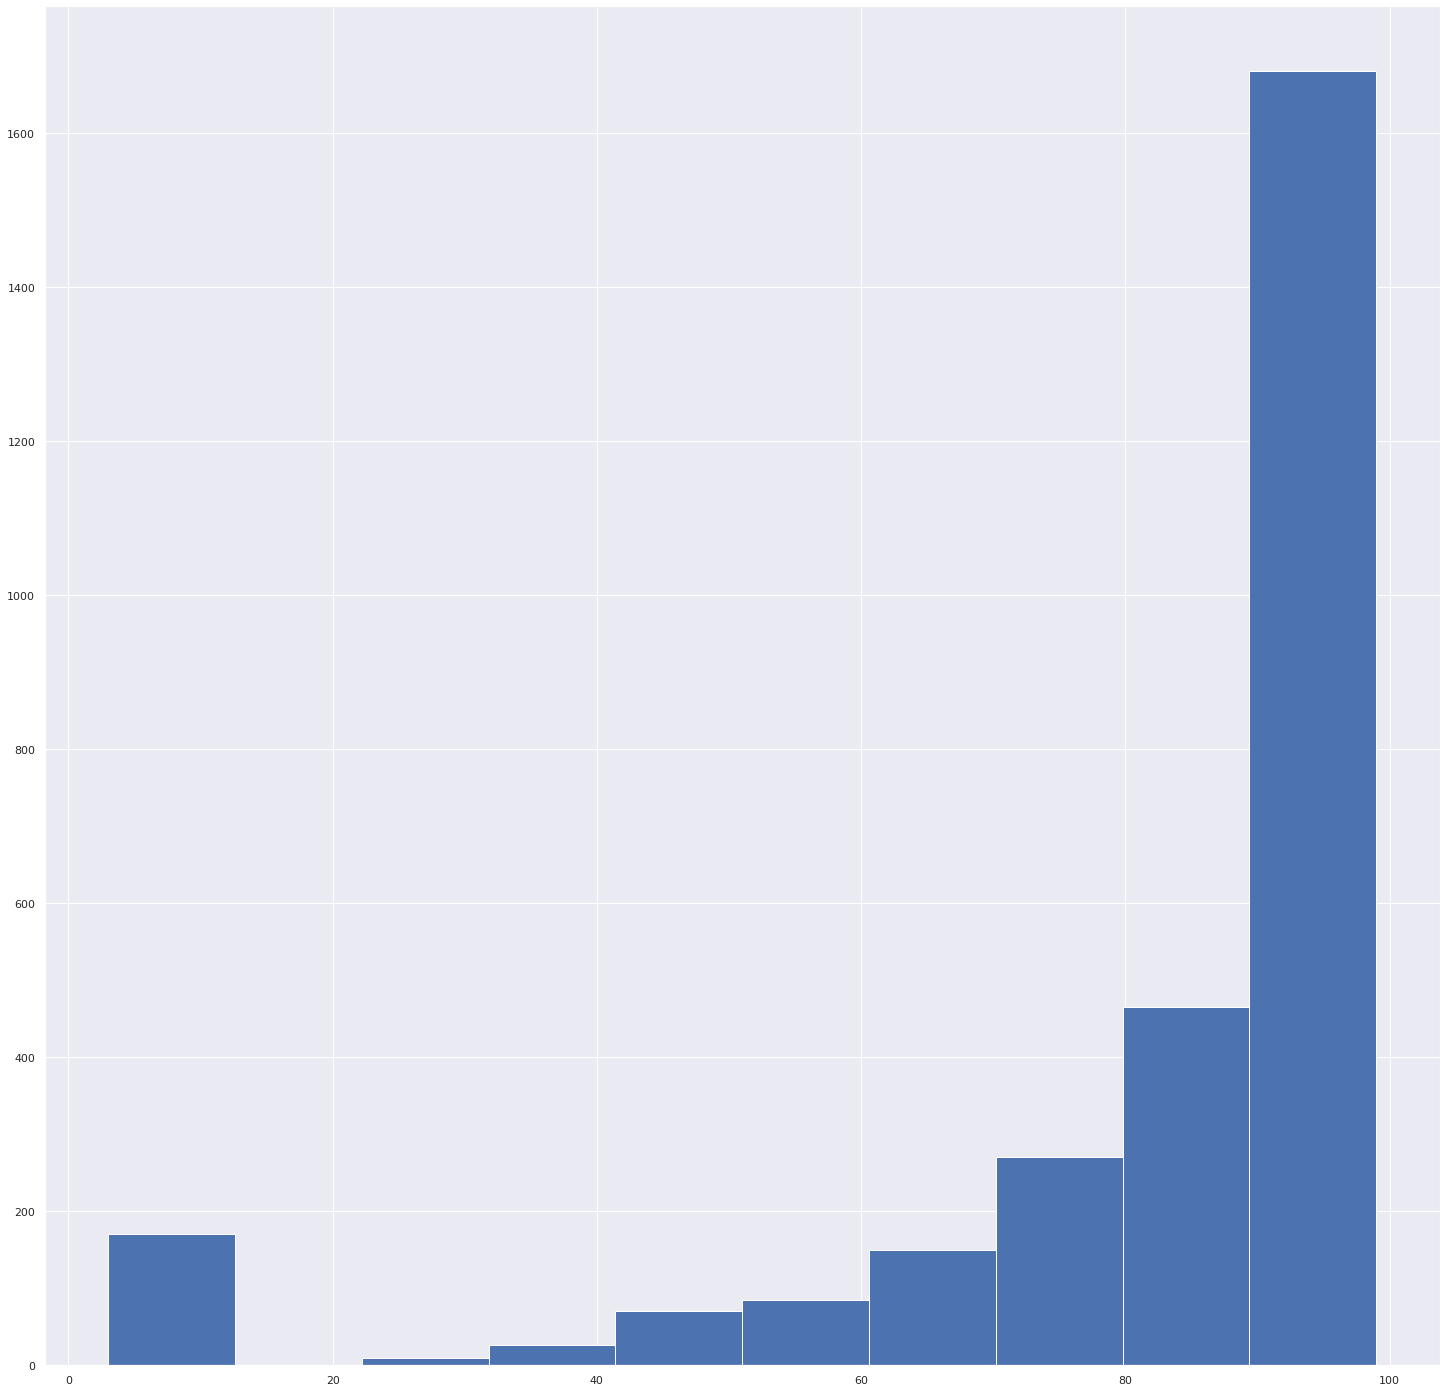

In [39]:
polioArr = np.array(df_cleanup.select('Polio').collect())
plt.hist(polioArr)
plt.show()

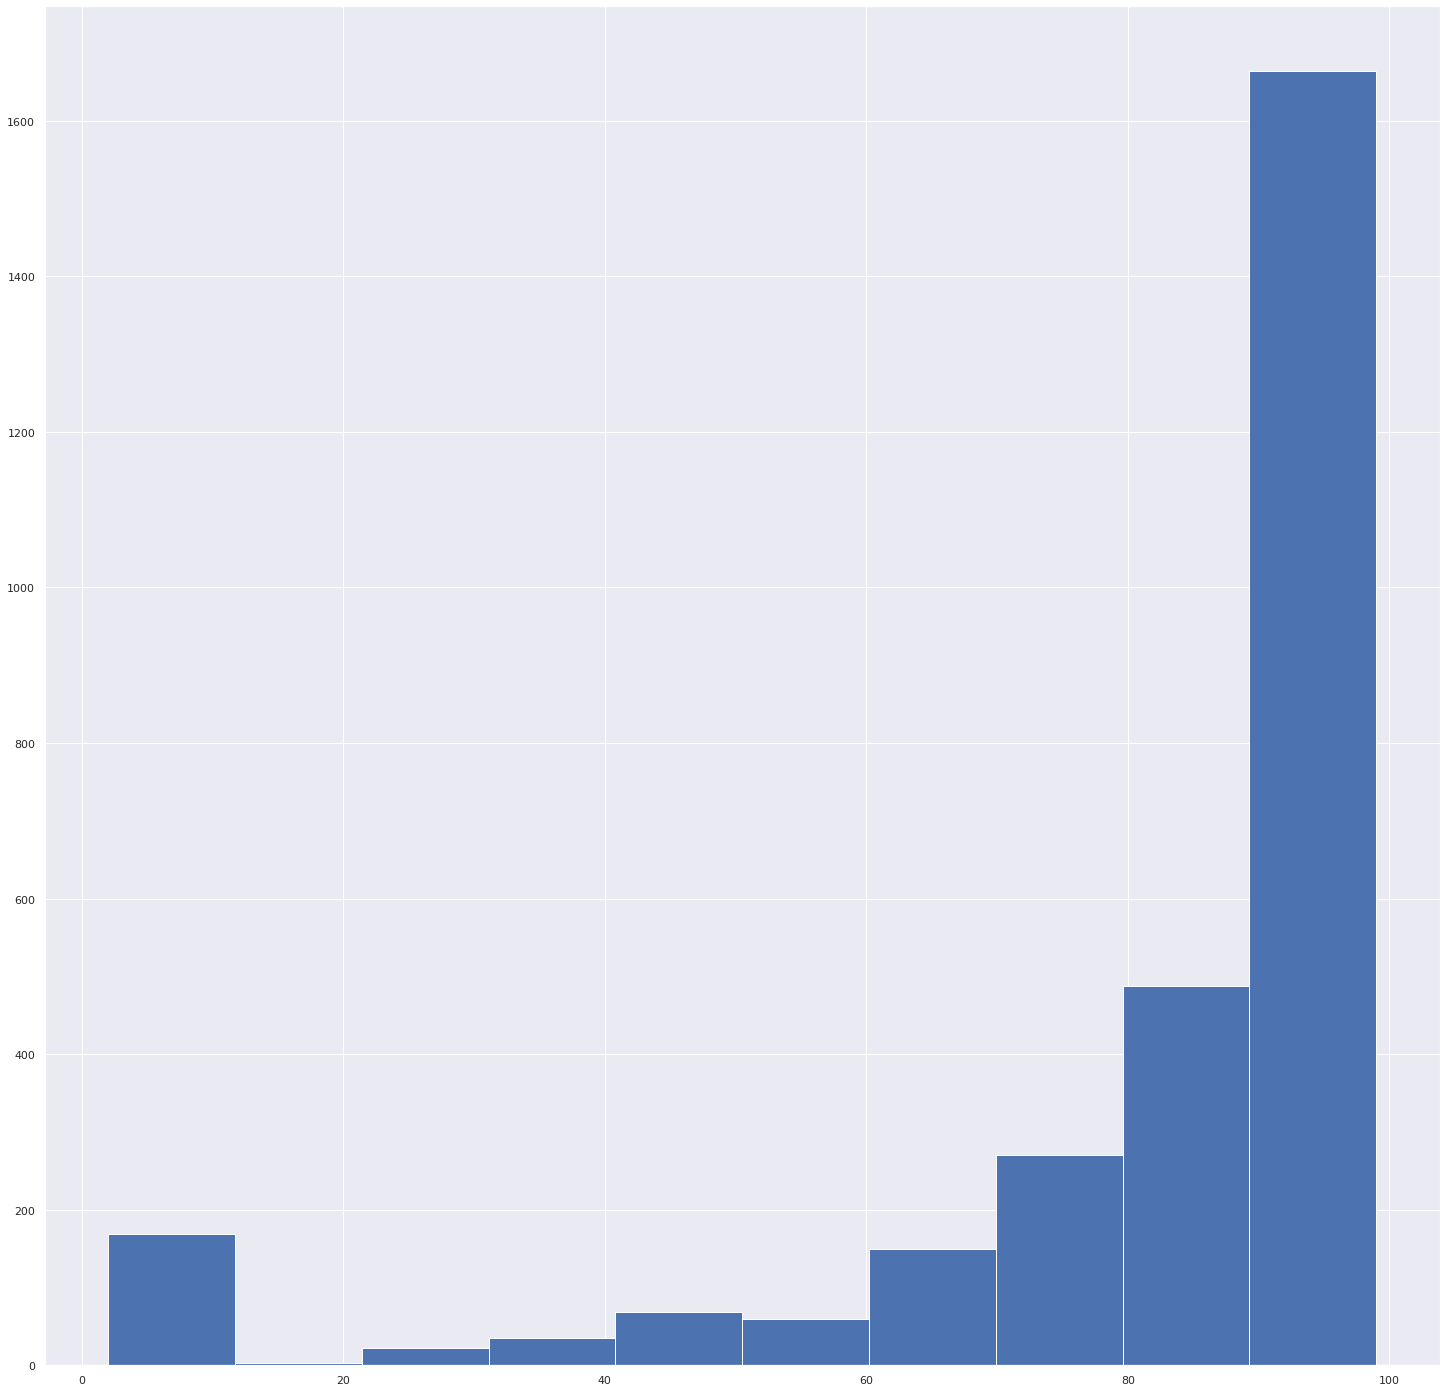

In [40]:
diArr = np.array(df_cleanup.select('Diphtheria ').collect())
plt.hist(diArr)
plt.show()

In [41]:
df_cleanup.toPandas().describe().transpose()

count          mean           std  \
Year                             2928.0  2.007500e+03  4.610560e+00   
Life expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
infant deaths                    2928.0  2.835827e+01  9.364363e+01   
Alcohol                          2928.0  4.614856e+00  3.914923e+00   
percentage expenditure           2928.0  7.403212e+02  1.990931e+03   
Hepatitis B                      2928.0  8.077937e+01  2.253450e+01   
Measles                          2928.0  2.155789e+02  3.186925e+02   
 BMI                             2928.0  3.823539e+01  1.985018e+01   
under-five deaths                2928.0  3.773941e+01  1.127774e+02   
Polio                            2928.0  8.254474e+01  2.334059e+01   
Total expenditure                2928.0  5.930163e+00  2.385478e+00   
Diphtheria                       2928.0  8.231933e+01  2.362959e+01   
 HIV/AIDS                        2928.0  1.747712e+00  5.085542e+00   
GDP                              2928.0  7.494211e+03  1.315713e+04   
Population                       2928.0  1.276454e+07  5.390628e+07   
 thinness  1-19 years            2928.0  4.850622e+00  4.396597e+00   
 thinness 5-9 years              2928.0  4.881423e+00  4.484890e+00   
Income composition of resources  2928.0  6.274187e-01  2.051306e-01   
Schooling                        2928.0  1.199964e+01  3.253691e+00   

                                        min            25%           50%  \
Year                             2000.00000    2003.750000  2.007500e+03   
Life expectancy                    36.30000      63.100000  7.210000e+01   
Adult Mortality                     1.00000      74.000000  1.440000e+02   
infant deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       1.107500  4.160000e+00   
percentage expenditure              0.00000       4.853964  6.561145e+01   
Hepatitis B                         1.00000      80.000000  8.700000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
 BMI                                1.00000      19.400000  4.300000e+01   
under-five deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total expenditure                   0.37000       4.370000  5.930163e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
 HIV/AIDS                           0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     578.797095  3.112561e+03   
Population                         34.00000  418120.500000  3.640009e+06   
 thinness  1-19 years               0.10000       1.600000  3.400000e+00   
 thinness 5-9 years                 0.10000       1.600000  3.400000e+00   
Income composition of resources     0.00000       0.504000  6.620000e-01   
Schooling                           0.00000      10.300000  1.210000e+01   

                                          75%           max  
Year                             2.011250e+03  2.015000e+03  
Life expectancy                  7.570000e+01  8.900000e+01  
Adult Mortality                  2.280000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.000000e+03  
Alcohol                          7.400000e+00  1.787000e+01  
percentage expenditure           4.426143e+02  1.947991e+04  
Hepatitis B                      9.600000e+01  9.900000e+01  
Measles                          3.622500e+02  8.450000e+02  
 BMI                             5.610000e+01  7.760000e+01  
under-five deaths                2.800000e+01  1.000000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                7.330000e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
 HIV/AIDS                        8.000000e-01  5.060000e+01  
GDP            

In [42]:
df_cleanup.select('Status').describe().show()
df_cleanup.select('Country').describe().show()

+-------+----------+
|summary|    Status|
+-------+----------+
|  count|      2928|
|   mean|      null|
| stddev|      null|
|    min| Developed|
|    max|Developing|
+-------+----------+

+-------+-----------+
|summary|    Country|
+-------+-----------+
|  count|       2928|
|   mean|       null|
| stddev|       null|
|    min|Afghanistan|
|    max|   Zimbabwe|
+-------+-----------+



In [43]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

indexers = [StringIndexer(inputCol='Status', outputCol="statusIndex") , StringIndexer(inputCol='Country', outputCol="countryIndex")]


pipeline = Pipeline(stages=indexers)
df_cleanup = pipeline.fit(df_cleanup).transform(df_cleanup)

df_cleanup.show()

+-----------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+-----------+-----------+---------------------+-------------------+-------------------------------+---------+-----------+------------+
|    Country|Year|    Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|        GDP| Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|statusIndex|countryIndex|
+-----------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+-----------+-----------+---------------------+-------------------+-------------------------------+---------+-----------+------------+
|

In [44]:
Africa = ('Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','Congo, Democratic Republic of','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe')
Asia = ('Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','Korea, North','Korea, South','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen')
Europe = ('Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','United Kingdom','Vatican City')
North_America = ('Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States')
South_America = ('Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela')
Australia_Oceania = ('Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu')



#df_cleanup2 = df_cleanup.withColumn(
#    'Country', 
#    F.when(
#        (df['Country'].contains(Africa)), "Africa"
        #F.round(F.mean('Measles ').over(Window.orderBy(F.lit(1)))).cast('int')
        # or you can use 
        #F.round(F.lit(df.select(F.mean(F.col('Measles ')).alias('mean')).collect()[0]['mean'])).cast('int')
#    ).otherwise(F.col('Country'))
#)


#from pyspark.sql import functions as F
#df_cleanup.select(df_cleanup.['Country'], F.when(df_cleanup.['Country'] > 4, 1).when(df.age < 3, -1).otherwise(0)).show()

In [45]:
df_cleanup.select("statusIndex").describe().show()
df_cleanup.select("countryIndex").describe().show()

+-------+-------------------+
|summary|        statusIndex|
+-------+-------------------+
|  count|               2928|
|   mean|0.17486338797814208|
| stddev|0.37991509370750476|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+

+-------+-----------------+
|summary|     countryIndex|
+-------+-----------------+
|  count|             2928|
|   mean|             91.0|
| stddev|52.83578416970972|
|    min|              0.0|
|    max|            182.0|
+-------+-----------------+



<AxesSubplot:>

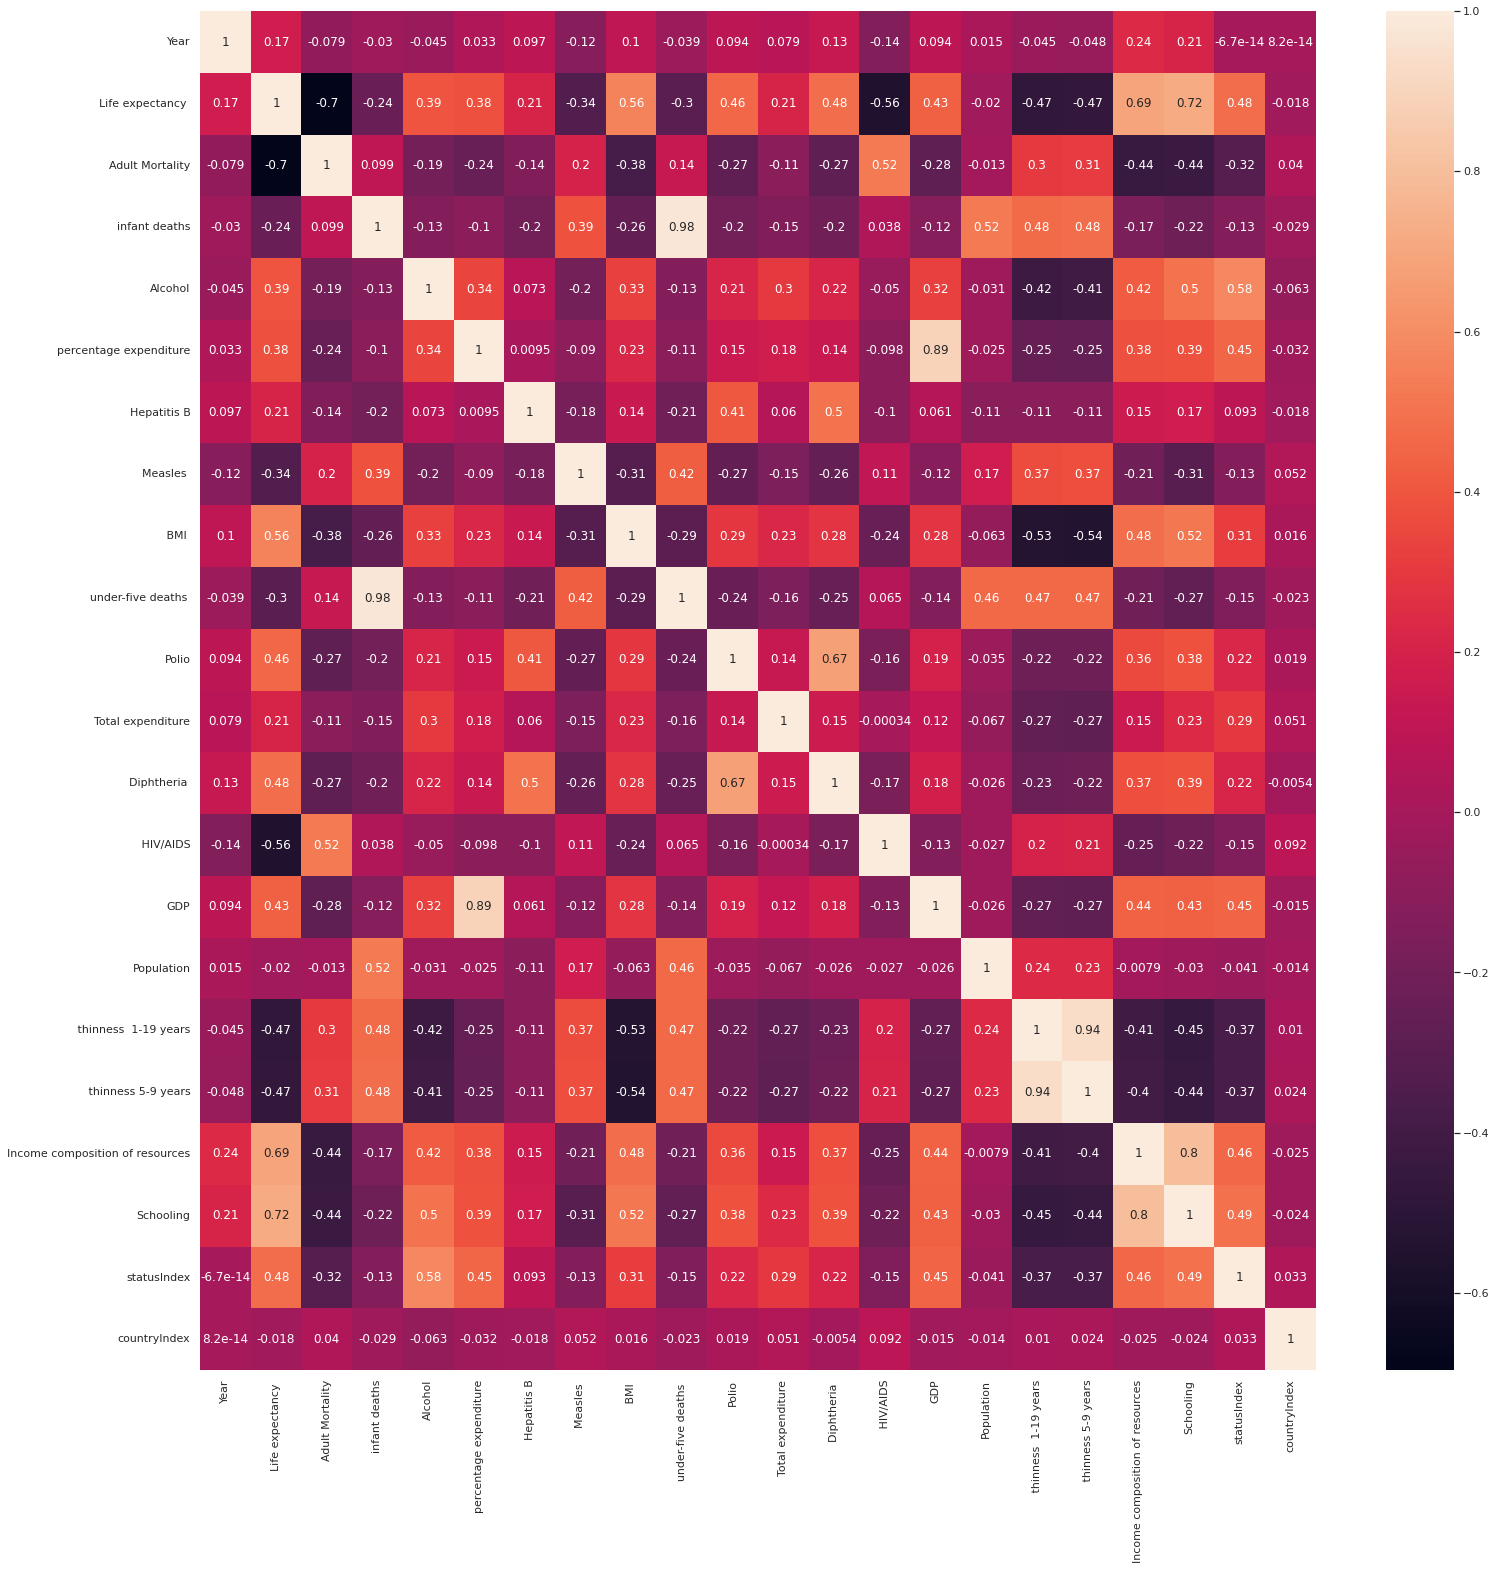

In [46]:
sns.set(rc={'figure.figsize':(25,25)})
corr2=df_cleanup.toPandas().iloc[:,:25].corr()
sns.heatmap(corr2, annot=True)

# formatting the data set as required

In [47]:
from pyspark.ml.regression import LinearRegression
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import VectorIndexer

In [48]:
assembler = VectorAssembler(
    inputCols=['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',"statusIndex"]
,
    outputCol="features")

In [49]:
# Now that we've created the assembler variable, let's actually transform the data.
output = assembler.transform(df_cleanup)

In [50]:
# Using print schema, you see that the features output column has been added. 
output.printSchema()

# You can see that the features column is a dense vector that combines the various features as expected.
output.head(1)

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: integer (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = false)
 |-- percentage expenditure: double (nullable = true)
 |-- Hepatitis B: integer (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = false)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Total expenditure: double (nullable = false)
 |-- Diphtheria : integer (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = false)
 |-- Population: double (nullable = false)
 |--  thinness  1-19 years: double (nullable = false)
 |--  thinness 5-9 years: double (nullable = false)
 |-- Income composition of resources: double (nullable = false)
 |-- Schooling: double (nullable = false)
 |-- st

22/10/13 07:16:14 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


[Row(Country='Afghanistan', Year=2015, Status='Developing', Life expectancy =65.0, Adult Mortality=263, infant deaths=62, Alcohol=0.01, percentage expenditure=71.27962362, Hepatitis B=65, Measles =800,  BMI =19.1, under-five deaths =83, Polio=6, Total expenditure=8.16, Diphtheria =65,  HIV/AIDS=0.1, GDP=584.25921, Population=33736494.0,  thinness  1-19 years=17.2,  thinness 5-9 years=17.3, Income composition of resources=0.479, Schooling=10.1, statusIndex=0.0, countryIndex=0.0, features=DenseVector([2015.0, 263.0, 62.0, 0.01, 71.2796, 65.0, 800.0, 19.1, 83.0, 6.0, 8.16, 65.0, 0.1, 584.2592, 33736494.0, 17.2, 17.3, 0.479, 10.1, 0.0]))]

In [51]:
# Let's select two columns (the feature and predictor).
# This is now in the appropriate format to be processed by Spark.
final_data = output.select("features",'Life expectancy ')
final_data.show()

+--------------------+----------------+
|            features|Life expectancy |
+--------------------+----------------+
|[2015.0,263.0,62....|            65.0|
|[2014.0,271.0,64....|            59.9|
|[2013.0,268.0,66....|            59.9|
|[2012.0,272.0,69....|            59.5|
|[2011.0,275.0,71....|            59.2|
|[2010.0,279.0,74....|            58.8|
|[2009.0,281.0,77....|            58.6|
|[2008.0,287.0,80....|            58.1|
|[2007.0,295.0,82....|            57.5|
|[2006.0,295.0,84....|            57.3|
|[2005.0,291.0,85....|            57.3|
|[2004.0,293.0,87....|            57.0|
|[2003.0,295.0,87....|            56.7|
|[2002.0,3.0,88.0,...|            56.2|
|[2001.0,316.0,88....|            55.3|
|[2000.0,321.0,88....|            54.8|
|[2015.0,74.0,0.0,...|            77.8|
|[2014.0,8.0,0.0,4...|            77.5|
|[2013.0,84.0,0.0,...|            77.2|
|[2012.0,86.0,0.0,...|            76.9|
+--------------------+----------------+
only showing top 20 rows



In [52]:
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
train_data,test_data = final_data.randomSplit([0.6,0.4])

In [53]:
# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+-----------------+
|summary| Life expectancy |
+-------+-----------------+
|  count|             1738|
|   mean|69.32405063291142|
| stddev|9.495992388136504|
|    min|             39.0|
|    max|             89.0|
+-------+-----------------+

+-------+-----------------+
|summary| Life expectancy |
+-------+-----------------+
|  count|             1190|
|   mean|69.08016806722691|
| stddev|9.566584504420819|
|    min|             36.3|
|    max|             89.0|
+-------+-----------------+



# Try for the linear regression

In [54]:
lr = LinearRegression(labelCol='Life expectancy ',maxIter=10, regParam=0.3, elasticNetParam=0.8)
#lr = LinearRegression(labelCol='Life expectancy ')

In [55]:
# Fit the model to the data.
lrModel = lr.fit(train_data)

22/10/13 07:16:17 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/10/13 07:16:17 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


In [56]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [0.0,-0.01903654201869408,0.0,0.0,0.0001293404636064376,0.0,-0.0010555812555532612,0.049865234248928476,-0.001675916223106899,0.01774942589517595,0.03473780713142259,0.03846036543954302,-0.4497825896629057,1.0053013083174133e-05,0.0,0.0,0.0,6.892643279780946,0.6781735531098843,1.8855829482592266] Intercept: 53.68796571704191


In [57]:
# Let's evaluate the model against the test data.
test_results = lrModel.evaluate(test_data)

In [58]:
# Interesting results! This shows the difference between the predicted value and the test data.
test_results.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

+-------------------+
|          residuals|
+-------------------+
|  -8.31240526329168|
|0.15142799322711653|
|-2.3783660811003102|
|0.10879653730930272|
|-0.5836728648258998|
| 3.0977967373160027|
| -2.699623400823725|
|0.07043622893559842|
| -5.799070260932673|
|-3.1566187152518452|
| -9.615106888002344|
|  -9.56352831879665|
| -5.517140308206521|
| -7.753847913348103|
|-13.217241124213615|
|  4.281941795499762|
|-2.6124894496146993|
|  3.368115185884193|
|  6.556635527953333|
| 15.713180462106308|
+-------------------+
only showing top 20 rows

RSME: 4.393541115066453


In [59]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

R2: 0.7889036751486613


In [60]:
final_data.describe().show()

+-------+-----------------+
|summary| Life expectancy |
+-------+-----------------+
|  count|             2928|
|   mean|69.22493169398915|
| stddev|9.523867487824305|
|    min|             36.3|
|    max|             89.0|
+-------+-----------------+



In [61]:
from pyspark.ml.regression import GeneralizedLinearRegression
glr = GeneralizedLinearRegression(labelCol='Life expectancy ')

# Fit the model
glrmodel = glr.fit(train_data)

# Print the coefficients and intercept for generalized linear regression model
print("Coefficients: " + str(glrmodel.coefficients))
print("Intercept: " + str(glrmodel.intercept))

# Summarize the model over the training set and print out some metrics
summary1 = glrmodel.summary
print("Coefficient Standard Errors: " + str(summary1.coefficientStandardErrors))
print("T Values: " + str(summary1.tValues))
print("P Values: " + str(summary1.pValues))
print("Dispersion: " + str(summary1.dispersion))
print("Null Deviance: " + str(summary1.nullDeviance))
print("Residual Degree Of Freedom Null: " + str(summary1.residualDegreeOfFreedomNull))
print("Deviance: " + str(summary1.deviance))
print("Residual Degree Of Freedom: " + str(summary1.residualDegreeOfFreedom))
print("AIC: " + str(summary1.aic))
print("Deviance Residuals: ")
summary1.residuals().show()

22/10/13 07:16:19 WARN Instrumentation: [053c53bd] regParam is zero, which might cause numerical instability and overfitting.
22/10/13 07:16:20 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Coefficients: [-0.005587614800898326,-0.018681674476852914,0.035174080974120656,0.007630620894416457,0.00018711517465863384,-0.017255614117115625,-0.0011821869279825523,0.04750603266831433,-0.03267692374498419,0.021915407925000754,0.08200336278822078,0.04467798129481856,-0.4835933752424409,1.1687221142823288e-05,-6.946622061959578e-10,-0.1059533799811372,0.07411561633343787,6.8298311781254695,0.6436947345056024,2.0277730557522204]
Intercept: 65.93528078535809
Coefficient Standard Errors: [0.022327436838060398, 0.0010204914098168119, 0.006178764680330367, 0.03272137628848055, 0.00010424145771207373, 0.005124139167379205, 0.0003498010193310388, 0.006450340661577597, 0.005126273331492019, 0.005763162345869055, 0.043025485543558735, 0.006051641561580811, 0.020975318801987237, 1.616803336285205e-05, 2.002549335831458e-09, 0.06867378792785385, 0.06788735870647301, 0.8570452818859967, 0.05669002733752181, 0.33522299226211477, 44.67077726700317]
T Values: [-0.250257781106939, -18.3065475095047

# Dicision tree regression

In [62]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator


# Train a DecisionTree model.
dt = DecisionTreeRegressor(labelCol='Life expectancy ')

# Train model.  This also runs the indexer.
model1 = dt.fit(train_data)

# Make predictions.
predictions = model1.transform(test_data)

predictions.select("prediction", "Life expectancy ", "features").show(5)
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="Life expectancy ", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


+-----------------+----------------+--------------------+
|       prediction|Life expectancy |            features|
+-----------------+----------------+--------------------+
|         61.42875|            52.1|[2000.0,3.0,5.0,2...|
|74.17873684210524|            72.6|[2000.0,11.0,1.0,...|
|74.17873684210524|            72.6|[2000.0,11.0,10.0...|
|74.17873684210524|            73.0|[2000.0,15.0,35.0...|
| 67.2578947368421|            68.6|[2000.0,16.0,27.0...|
+-----------------+----------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 3.29865


# Random forest regression

In [63]:
from pyspark.ml.regression import RandomForestRegressor

# Train a RandomForest model.
rfmodel = RandomForestRegressor(labelCol='Life expectancy ')

model2 = rfmodel.fit(train_data)

# Make predictions.
predictions = model2.transform(test_data)

# Select example rows to display.
predictions.select("prediction", "Life expectancy ", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="Life expectancy ", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


+------------------+----------------+--------------------+
|        prediction|Life expectancy |            features|
+------------------+----------------+--------------------+
|55.693948669357226|            52.1|[2000.0,3.0,5.0,2...|
| 73.03173334333641|            72.6|[2000.0,11.0,1.0,...|
| 72.79419811993952|            72.6|[2000.0,11.0,10.0...|
| 72.53637326901253|            73.0|[2000.0,15.0,35.0...|
| 68.78519305177021|            68.6|[2000.0,16.0,27.0...|
+------------------+----------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 2.8107


# Gradient-boosted tree regression

In [64]:
from pyspark.ml.regression import GBTRegressor

# Train a GBT model.
gbtmodel = GBTRegressor(labelCol='Life expectancy ', maxIter=10)

model3 = gbtmodel.fit(train_data)


predictions = model3.transform(test_data)

predictions.select("prediction", "Life expectancy ", "features").show(5)


evaluator = RegressionEvaluator(
    labelCol="Life expectancy ", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+-----------------+----------------+--------------------+
|       prediction|Life expectancy |            features|
+-----------------+----------------+--------------------+
|60.05750853731807|            52.1|[2000.0,3.0,5.0,2...|
|74.46629373807708|            72.6|[2000.0,11.0,1.0,...|
|73.51569249756676|            72.6|[2000.0,11.0,10.0...|
|72.61169748395415|            73.0|[2000.0,15.0,35.0...|
|65.69085537869103|            68.6|[2000.0,16.0,27.0...|
+-----------------+----------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 2.92973


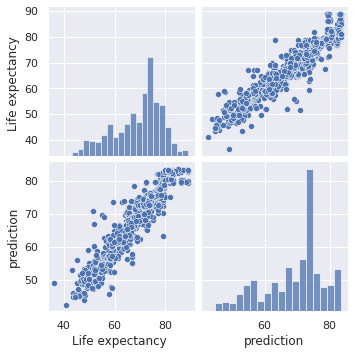

In [65]:
sns.pairplot(predictions.toPandas())

# Factorization machines regression

In [66]:
from pyspark.ml.regression import FMRegressor


# Train a FM model.
fm = FMRegressor(labelCol='Life expectancy ', stepSize=0.001)


# Train model.
model4 = fm.fit(train_data)

# Make predictions.
predictions = model4.transform(test_data)

# Select example rows to display.
predictions.select("prediction", "Life expectancy ", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="Life expectancy ", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


+-------------------+----------------+--------------------+
|         prediction|Life expectancy |            features|
+-------------------+----------------+--------------------+
|-14505.264114671925|            52.1|[2000.0,3.0,5.0,2...|
|  456.3045488863954|            72.6|[2000.0,11.0,1.0,...|
|-475188.34306620155|            72.6|[2000.0,11.0,10.0...|
| 229664.56463705003|            73.0|[2000.0,15.0,35.0...|
| 1777770.4645753112|            68.6|[2000.0,16.0,27.0...|
+-------------------+----------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 1.3349e+06


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df_y = df_cleanup[['Life expectancy ']]
df_X = df_cleanup.drop('Life expectancy ').drop('Country').drop('Status')
x = df_X.toPandas().to_numpy()
y = df_y.toPandas().to_numpy()
sk = SelectKBest(chi2)
X_new = sk.fit_transform(x, y)
scores = list(sk.scores_)
data = pd.DataFrame({'feature':  df_X.columns, 'importance': scores})
plt.figure(figsize=(8,6))
g = sns.barplot(data=data, x="feature", y="importance")
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.set_yscale("log")
plt.tight_layout()
plt.show()